In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.stats as scs
import seaborn as sns
from matplotlib import patheffects
from scipy.stats._survival import EmpiricalDistributionFunction
from calendar import month_name
from typing import Literal
import spei as si  # si for standardized index

print(si.show_versions())

python: 3.13.5
spei: 0.8.2
numpy: 2.1.3
scipy: 1.15.3
matplotlib: 3.10.0
pandas: 2.2.3


In [2]:
# Read imputed metadata
metadata = pd.read_excel('data/metadata_10%_79pos_2010-01-01.xlsx') 
metadata = metadata.set_index(['Pos Hujan ID'])
metadata

# Read imputed data
data_daily = pd.read_excel('data/dailyprecip_10%_79pos_2010-01-01_imputed.xlsx')
data_daily = data_daily.set_index(['DATA TIMESTAMP'])
data_daily

34010101a  34010201a  34010202a  34010301a  34010401a  \
DATA TIMESTAMP                                                          
2010-01-01            0.0        0.0        0.0        0.0        0.0   
2010-01-02            0.0        0.0        0.0        0.0        0.0   
2010-01-03            0.0        0.0        0.0        0.0        0.0   
2010-01-04           11.0       13.0        0.0        0.0        0.0   
2010-01-05            8.0        0.0       12.0       11.0       30.0   
...                   ...        ...        ...        ...        ...   
2024-12-27           35.0       17.6       29.0       31.5       23.0   
2024-12-28            0.0        0.0        0.0        0.0        1.0   
2024-12-29           11.0        9.0        6.5        6.0        3.0   
2024-12-30           17.0       14.7       20.5       19.5       10.0   
2024-12-31            3.0        5.6        7.5        6.0        0.0   

                34010402a  34010501a  34010601a  34010701a  34010801a  ...  \
DATA TIMESTAMP                                                         ...   
2010-01-01            0.0        0.0        0.0        0.0        0.0  ...   
2010-01-02            0.0        0.0        0.0        0.0        0.0  ...   
2010-01-03            0.0        0.0        0.0        0.0        0.0  ...   
2010-01-04            0.0        0.0        0.0        0.0        7.0  ...   
2010-01-05           30.0       30.0        0.0        0.0        2.0  ...   
...                   ...        ...        ...        ...        ...  ...   
2024-12-27           21.5       23.0       13.0       11.1       18.0  ...   
2024-12-28            0.0        5.0        0.0        0.0        0.0  ...   
2024-12-29            6.0        4.0       13.0        3.2        4.0  ...   
2024-12-30           14.0       15.0       12.0       24.8        1.5  ...   
2024-12-31            2.5        7.0        3.0        0.9        0.0  ...   

                34041303a  34041401a  34041501a  34041502a  34041504a  \
DATA TIMESTAMP                                                          
2010-01-01            0.0        0.0       58.0       57.0       49.1   
2010-01-02            0.0        0.0       55.0       53.0       43.7   
2010-01-03            0.0        0.0       20.0       17.0       16.9   
2010-01-04            7.0       13.0        0.0        0.0        0.3   
2010-01-05            0.0        0.0        0.0        0.0        0.0   
...                   ...        ...        ...        ...        ...   
2024-12-27           24.0       21.5        9.0       11.5        9.0   
2024-12-28            0.0        0.0        0.0        0.0        2.4   
2024-12-29            5.0       10.0       11.0       11.0       13.0   
2024-12-30            3.0        3.5        4.5        2.5        3.2   
2024-12-31            3.0       12.0       20.0       26.0       21.0   

                34041601a  34041701a  34041702a  34041704a  34021301a  
DATA TIMESTAMP                                                         
2010-01-01           25.0       22.0       24.8       36.6        0.0  
2010-01-02            2.0        2.0        6.4       24.2        0.0  
2010-01-03            0.0        1.0        3.2       10.2        0.0  
2010-01-04            0.0        0.0        0.0        0.2        0.0  
2010-01-05            0.0        0.0        0.0        0.0        0.0  
...                   ...        ...        ...        ...        ...  
2024-12-27           10.5       10.0        4.5        5.5       16.0  
2024-12-28            0.0        0.0        0.0        0.0        0.0  
2024-12-29           10.5       11.0        8.0       18.0        4.0  
2024-12-30            5.0        6.0        0.5        2.0       11.5  
2024-12-31           45.5       33.5       18.5       21.0        1.0  

[5479 rows x 79 columns]

In [3]:
metadata

Nama Stasiun      Balai       Provinsi         Kabupaten  \
Pos Hujan ID                                                             
34010101a        BPP Temon  Region II  DI Yogyakarta  Kab. Kulon Progo   
34010201a             Beji  Region II  DI Yogyakarta  Kab. Kulon Progo   
34010202a      BPP Kulwaru  Region II  DI Yogyakarta  Kab. Kulon Progo   
34010301a     BPP Panjatan  Region II  DI Yogyakarta  Kab. Kulon Progo   
34010401a      PSDA Brosot  Region II  DI Yogyakarta  Kab. Kulon Progo   
...                    ...        ...            ...               ...   
34041504a      Tunggularum  Region II  DI Yogyakarta       Kab. Sleman   
34041601a            Pakem  Region II  DI Yogyakarta       Kab. Sleman   
34041701a        Bronggang  Region II  DI Yogyakarta       Kab. Sleman   
34041702a            Cepit  Region II  DI Yogyakarta       Kab. Sleman   
34041704a          Gondang  Region II  DI Yogyakarta       Kab. Sleman   

              Lintang      Bujur  Elevasi  ZOM  
Pos Hujan ID                                    
34010101a    -7.89000  110.08000        0  273  
34010201a    -7.87300  110.16200        0  273  
34010202a    -7.89000  110.11700        0  273  
34010301a    -7.92308  110.15800        0  273  
34010401a    -7.95000  110.22400        0  273  
...               ...        ...      ...  ...  
34041504a    -7.59981  110.39375      748  269  
34041601a    -7.67308  110.42014        0  269  
34041701a    -7.66086  110.44419        0  269  
34041702a    -7.65642  110.46722      524  269  
34041704a    -7.62308  110.43375      765  269  

[79 rows x 8 columns]

In [3]:
# Compute rolling precipitation totals for different time windows
# Each rolling window requires a minimum number of valid days equal to its length

rolled_10 = data_daily.rolling(10, min_periods=10).sum().dropna()
rolled_15 = data_daily.rolling(15, min_periods=15).sum().dropna()
rolled_20 = data_daily.rolling(20, min_periods=20).sum().dropna()
rolled_30 = data_daily.rolling(30, min_periods=30).sum().dropna()
rolled_60 = data_daily.rolling(60, min_periods=60).sum().dropna()
rolled_90 = data_daily.rolling(90, min_periods=90).sum().dropna()


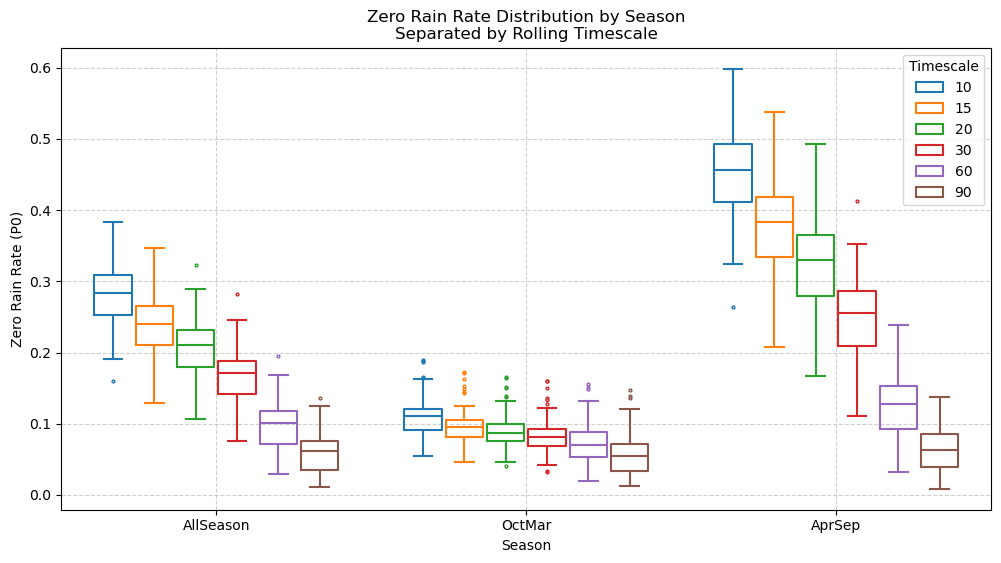

Season Timescale  Count    Mean     Std     Min      Q1  Median  \
0   AllSeason        10     79  0.2805  0.0426  0.1596  0.2532  0.2843   
1   AllSeason        15     79  0.2365  0.0413  0.1286  0.2106  0.2399   
2   AllSeason        20     79  0.2063  0.0409  0.1066  0.1795  0.2103   
3   AllSeason        30     79  0.1656  0.0406  0.0763  0.1417  0.1708   
4   AllSeason        60     79  0.0985  0.0346  0.0290  0.0720  0.1007   
5   AllSeason        90     79  0.0592  0.0277  0.0109  0.0345  0.0616   
12     AprSep        10     79  0.4490  0.0618  0.2638  0.4118  0.4557   
13     AprSep        15     79  0.3750  0.0614  0.2084  0.3335  0.3836   
14     AprSep        20     79  0.3214  0.0605  0.1668  0.2792  0.3297   
15     AprSep        30     79  0.2471  0.0587  0.1107  0.2095  0.2561   
16     AprSep        60     79  0.1245  0.0424  0.0317  0.0923  0.1275   
17     AprSep        90     79  0.0619  0.0285  0.0087  0.0386  0.0634   
6      OctMar        10     79  0.1108  0.0273  0.0547  0.0914  0.1112   
7      OctMar        15     79  0.0967  0.0250  0.0467  0.0818  0.0952   
8      OctMar        20     79  0.0899  0.0249  0.0405  0.0764  0.0877   
9      OctMar        30     79  0.0829  0.0255  0.0318  0.0693  0.0813   
10     OctMar        60     79  0.0718  0.0291  0.0191  0.0538  0.0699   
11     OctMar        90     79  0.0564  0.0297  0.0132  0.0335  0.0541   

        Q3     Max     IQR  
0   0.3093  0.3832  0.0561  
1   0.2654  0.3464  0.0548  
2   0.2319  0.3223  0.0524  
3   0.1878  0.2826  0.0461  
4   0.1173  0.1958  0.0453  
5   0.0752  0.1367  0.0407  
12  0.4933  0.5985  0.0814  
13  0.4179  0.5384  0.0843  
14  0.3648  0.4929  0.0856  
15  0.2860  0.4128  0.0765  
16  0.1536  0.2383  0.0612  
17  0.0851  0.1377  0.0464  
6   0.1202  0.1894  0.0288  
7   0.1055  0.1728  0.0237  
8   0.0993  0.1650  0.0228  
9   0.0924  0.1604  0.0231  
10  0.0884  0.1563  0.0346  
11  0.0716  0.1474  0.0382

Saved: data/dspi/ZRR_boxplot_statistics.xlsx


In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Function to calculate the zero-rain rate for a given season
def zero_rain_rate_by_season(df, season):
    if season == "OctMar":
        mask = df.index.month.isin([10, 11, 12, 1, 2, 3])
        df_season = df[mask]
    elif season == "AprSep":
        mask = df.index.month.isin([4, 5, 6, 7, 8, 9])
        df_season = df[mask]
    elif season == "AllSeason":
        df_season = df
    else:
        raise ValueError("Season must be 'OctMar', 'AprSep', or 'AllSeason'")
    
    return (df_season == 0).sum() / len(df_season)


# Compute Zero-Rain Rate table
zrr = pd.concat({
    "AllSeason": pd.DataFrame({
        "10": zero_rain_rate_by_season(rolled_10, "AllSeason"),
        "15": zero_rain_rate_by_season(rolled_15, "AllSeason"),
        "20": zero_rain_rate_by_season(rolled_20, "AllSeason"),
        "30": zero_rain_rate_by_season(rolled_30, "AllSeason"),
        "60": zero_rain_rate_by_season(rolled_60, "AllSeason"),
        "90": zero_rain_rate_by_season(rolled_90, "AllSeason"),
    }),
    "OctMar": pd.DataFrame({
        "10": zero_rain_rate_by_season(rolled_10, "OctMar"),
        "15": zero_rain_rate_by_season(rolled_15, "OctMar"),
        "20": zero_rain_rate_by_season(rolled_20, "OctMar"),
        "30": zero_rain_rate_by_season(rolled_30, "OctMar"),
        "60": zero_rain_rate_by_season(rolled_60, "OctMar"),
        "90": zero_rain_rate_by_season(rolled_90, "OctMar"),
    }),
    "AprSep": pd.DataFrame({
        "10": zero_rain_rate_by_season(rolled_10, "AprSep"),
        "15": zero_rain_rate_by_season(rolled_15, "AprSep"),
        "20": zero_rain_rate_by_season(rolled_20, "AprSep"),
        "30": zero_rain_rate_by_season(rolled_30, "AprSep"),
        "60": zero_rain_rate_by_season(rolled_60, "AprSep"),
        "90": zero_rain_rate_by_season(rolled_90, "AprSep"),
    })
}, axis=0)

zrr.index.names = ["Season", "Station"]

# Convert to long format
zrr_long = (
    zrr.reset_index()
       .melt(id_vars=["Season", "Station"],
             var_name="Timescale",
             value_name="ZeroRainRate")
)

# Plot Zero-Rain-Rate Boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(
    data=zrr_long,
    x="Season",
    y="ZeroRainRate",
    hue="Timescale",
    dodge=True,
    linewidth=1.5,
    fliersize=2,
    fill=False,
    gap=.1,
    legend="auto"
)
plt.ylabel("Zero Rain Rate (P0)")
plt.xlabel("Season")
plt.title("Zero Rain Rate Distribution by Season\nSeparated by Rolling Timescale")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

# Compute descriptive statistics for each season and rolling time scale combination.
# The output includes count, mean, standard deviation, quartiles, min, max, and IQR.

stats_list = []

for season in ["AllSeason", "OctMar", "AprSep"]:
    df_season = zrr_long[zrr_long["Season"] == season]
    
    for tscale in sorted(df_season["Timescale"].unique(), key=lambda x: int(x)):
        subset = df_season[df_season["Timescale"] == tscale]["ZeroRainRate"]

        stats_list.append({
            "Season": season,
            "Timescale": tscale,
            "Count": subset.count(),
            "Mean": round(subset.mean(), 4),
            "Std": round(subset.std(), 4),
            "Min": round(subset.min(), 4),
            "Q1": round(subset.quantile(0.25), 4),
            "Median": round(subset.median(), 4),
            "Q3": round(subset.quantile(0.75), 4),
            "Max": round(subset.max(), 4),
            "IQR": round(subset.quantile(0.75) - subset.quantile(0.25), 4)
        })

zrr_stats = pd.DataFrame(stats_list)
zrr_stats = zrr_stats.sort_values(["Season", "Timescale"])

# Display statistics
display(zrr_stats)

# Save output
zrr_stats.to_excel("data/dspi/ZRR_boxplot_statistics.xlsx", index=False)
print("Saved: data/dspi/ZRR_boxplot_statistics.xlsx")


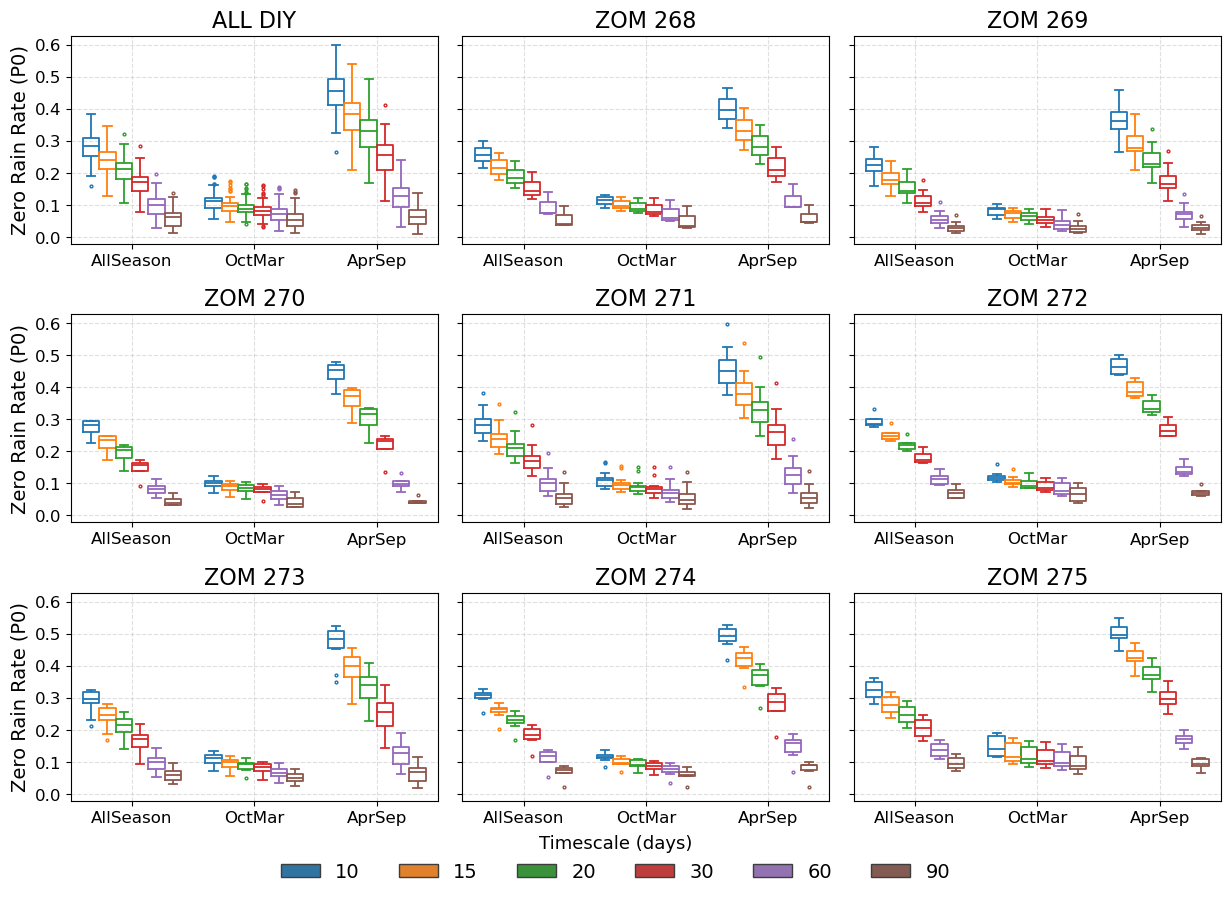

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Global figure styling for clarity in A4 print
plt.rcParams['font.size'] = 13
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['legend.fontsize'] = 14

# Prepare mapping station → ZOM
station_to_zom = metadata["ZOM"].to_dict()

# Add ZOM field to ZRR long-format table
zrr_long["ZOM"] = zrr_long["Station"].map(station_to_zom)

# Ordered ZOM panels (268–275)
zom_list = list(range(268, 276))

# Create temporary plot to extract legend handles
fig_tmp, ax_tmp = plt.subplots()
sns.boxplot(
    data=zrr_long,
    x="Season",
    y="ZeroRainRate",
    hue="Timescale",
    ax=ax_tmp
)
handles, labels = ax_tmp.get_legend_handles_labels()
plt.close(fig_tmp)

# Create 3×3 panel figure (A4 landscape proportion)
fig, axes = plt.subplots(3, 3, figsize=(12.5, 9), sharey=True)
axes = axes.flatten()

panel_titles = ["ALL DIY"] + [f"ZOM {z}" for z in zom_list]

# Build each panel
for i, title in enumerate(panel_titles):
    ax = axes[i]

    # Select ZOM or full data
    if i == 0:
        df_plot = zrr_long.copy()
        zom_id = "ALL"
    else:
        zom_id = zom_list[i - 1]
        df_plot = zrr_long[zrr_long["ZOM"] == zom_id]

    # Handle empty ZOM panels
    if df_plot.empty:
        ax.text(0.5, 0.5, "No data", ha="center", va="center", fontsize=12)
        ax.set_title(title)
        ax.set_xlabel("")
        ax.set_ylabel("")
        continue

    # Draw boxplot
    sns.boxplot(
        data=df_plot,
        x="Season",
        y="ZeroRainRate",
        hue="Timescale",
        ax=ax,
        dodge=True,
        linewidth=1.3,
        fliersize=2,
        fill=False,
        legend=False
    )

    # Panel styling
    ax.set_title(title, fontsize=16)
    ax.grid(True, linestyle="--", alpha=0.4)
    ax.set_xlabel("")
    ax.yaxis.set_major_locator(plt.MultipleLocator(0.1))

    if i % 3 == 0:
        ax.set_ylabel("Zero Rain Rate (P0)")
    else:
        ax.set_ylabel("")

# Add shared legend at bottom
fig.legend(
    handles,
    labels,
    title="Timescale (days)",
    loc="lower center",
    ncol=6,
    bbox_to_anchor=(0.5, -0.01),
    frameon=False
)

# Improve spacing for A4
plt.tight_layout(rect=[0, 0.05, 1, 1])

# Show figure
plt.show()

# Save high-resolution copy for Word
# fig.savefig("ZRR_9panel_A4.png", dpi=600, bbox_inches="tight")
# print("Saved: ZRR_9panel_A4.png")


In [7]:
def seasonal_means(p_values: pd.Series) -> pd.Series:
    """
    Compute mean p_values for each season.
    Seasons:
    - OctMar  : October–March (wet season)
    - AprSep  : April–September (dry season)
    - AllSeason: all months January–December
    """
    if not isinstance(p_values.index, pd.DatetimeIndex):
        raise ValueError("The Series index must be a DatetimeIndex.")

    # Extract month values
    month = p_values.index.month

    # Create seasonal subsets
    season_octmar = p_values[(month >= 10) | (month <= 3)]   # October–March
    season_aprsep = p_values[(month >= 4) & (month <= 9)]    # April–September
    season_all = p_values                                     # All months

    # Compute means
    return pd.Series({
        "AllSeason": season_all.mean(),
        "OctMar": season_octmar.mean(),
        "AprSep": season_aprsep.mean()
    })

def monthly_means(p_values: pd.Series) -> pd.Series:
    """
    Compute mean values of p_values for each month.
    The Series index must be a DatetimeIndex.
    """
    if not isinstance(p_values.index, pd.DatetimeIndex):
        raise ValueError("The Series index must be a DatetimeIndex.")

    # Group by month number (1–12) and compute mean
    monthly_mean = p_values.groupby(p_values.index.month).mean()

    # Optional: convert month numbers to month names
    # monthly_mean.index = monthly_mean.index.map(
    #     lambda m: pd.to_datetime(str(m), format="%m").strftime("%B")
    # )

    return monthly_mean


In [4]:
# Dictionary of rolling precipitation datasets for each aggregation window
# Keys = window size (days), Values = rolling-sum DataFrames
rolled_dict = {
    10: rolled_10,
    15: rolled_15,
    20: rolled_20,
    30: rolled_30,
    60: rolled_60,
    90: rolled_90,
}

# List of probability distributions to be fitted
# Each item is a tuple: ("short_name", scipy_distribution_object)
dist_list = [
    ("gam", scs.gamma),        # Gamma distribution
    ("wei", scs.weibull_min),  # Weibull distribution
    ("gum", scs.gumbel_r),     # Gumbel (right-skewed)
    ("pe3", scs.pearson3),     # Pearson Type III
    ("gev", scs.genextreme),   # Generalized Extreme Value
    ("llg", scs.fisk),         # Log-logistic
    ("lgn", scs.lognorm)       # Lognormal
]


In [ ]:
import os
from joblib import Parallel, delayed

# Worker function for fitting one station
def fit_one_station(pos, rolled_data, dist_scipy, dist_name, window, metadata):
    records = []
    station_name = metadata.loc[pos]["Nama Stasiun"]

    print(f"Fitting {dist_name} for station {pos} ({station_name}) on {window}-day rolling sum")

    fit_dist = si.SI(
        rolled_data[pos],
        dist=dist_scipy,
        prob_zero=True,
        fit_freq="D"
    )
    fit_dist.fit_distribution()

    for date, dist_obj in fit_dist._dist_dict.items():
        p_value = dist_obj.ks_test()
        aic_dict = dist_obj.aic()

        records.append({
            "station_id": pos,
            "date": date,
            "p_value": p_value,
            "AIC_loglik": aic_dict.get("AIC_loglik", np.nan),
            "AIC_mse": aic_dict.get("AIC_mse", np.nan),
        })

    return records


# Load previous result file if available
def load_previous_result(path):
    if os.path.exists(path):
        df = pd.read_excel(path, index_col=0)
        df.index = pd.to_datetime(df.index)
        return df
    return None


for window, rolled_data in rolled_dict.items():
    for dist_name, dist_scipy in dist_list:

        print(f"\nProcessing distribution {dist_name} for window {window}")

        pv_path         = f"data/fitdist/result/pv_{dist_name}_{window}.xlsx"
        aic_loglik_path = f"data/fitdist/result/aic_loglik_{dist_name}_{window}.xlsx"
        aic_mse_path    = f"data/fitdist/result/aic_mse_{dist_name}_{window}.xlsx"

        pv_old      = load_previous_result(pv_path)
        aic_ll_old  = load_previous_result(aic_loglik_path)
        aic_mse_old = load_previous_result(aic_mse_path)

        old_stations = set(pv_old.columns) if pv_old is not None else set()
        valid_stations = set(metadata.index)

        # Remove old stations that are not present in metadata
        if pv_old is not None:
            stations_to_drop = old_stations - valid_stations
            if len(stations_to_drop) > 0:
                print(f"Removing stations not found in metadata: {stations_to_drop}")
                pv_old = pv_old.drop(columns=stations_to_drop, errors="ignore")
                aic_ll_old = aic_ll_old.drop(columns=stations_to_drop, errors="ignore")
                aic_mse_old = aic_mse_old.drop(columns=stations_to_drop, errors="ignore")
                old_stations -= stations_to_drop

        all_stations = set(rolled_data.columns)
        new_stations = all_stations - old_stations

        if len(new_stations) == 0:
            print("No new stations to compute. Skipping.")
            continue

        print(f"Stations to process: {len(new_stations)} {sorted(new_stations)}")

        results = Parallel(n_jobs=6, verbose=5)(
            delayed(fit_one_station)(pos, rolled_data, dist_scipy, dist_name, window, metadata)
            for pos in sorted(new_stations)
        )

        new_records = [r for sublist in results for r in sublist]
        df_new = pd.DataFrame(new_records)
        df_new["date"] = pd.to_datetime(df_new["date"])

        pv_new      = df_new.pivot(index="date", columns="station_id", values="p_value")
        aic_ll_new  = df_new.pivot(index="date", columns="station_id", values="AIC_loglik")
        aic_mse_new = df_new.pivot(index="date", columns="station_id", values="AIC_mse")

        pv_final      = pv_new if pv_old is None else pv_old.join(pv_new, how="outer")
        aic_ll_final  = aic_ll_new if aic_ll_old is None else aic_ll_old.join(aic_ll_new, how="outer")
        aic_mse_final = aic_mse_new if aic_mse_old is None else aic_mse_old.join(aic_mse_new, how="outer")

        pv_final.to_excel(pv_path)
        aic_ll_final.to_excel(aic_loglik_path)
        aic_mse_final.to_excel(aic_mse_path)

        print(f"Finished and saved: {dist_name} - {window} day window")


In [ ]:
from joblib import Parallel, delayed

# Worker function that fits one probability distribution to one station
def fit_one_station(pos, rolled_data, dist_scipy, dist_name, window, metadata):
    records = []
    station_name = metadata.loc[pos]["Nama Stasiun"]

    print(f"Fitting {dist_name} for station {pos} ({station_name}) on {window}-day rolling sum")

    fit_dist = si.SI(
        rolled_data[pos],
        dist=dist_scipy,
        prob_zero=True,
        fit_freq="D"
    )
    fit_dist.fit_distribution()

    for date, dist_obj in fit_dist._dist_dict.items():
        p_value = dist_obj.ks_test()
        aic_dict = dist_obj.aic()

        records.append({
            "station_id": pos,
            "date": date,
            "p_value": p_value,
            "AIC_loglik": aic_dict.get("AIC_loglik", np.nan),
            "AIC_mse": aic_dict.get("AIC_mse", np.nan),
        })

    return records


# Dictionary of rolling precipitation datasets for each aggregation window
rolled_dict = {
    10: rolled_10,
    15: rolled_15,
    20: rolled_20,
    30: rolled_30,
    60: rolled_60,
    90: rolled_90,
}

# List of probability distributions to fit
dist_list = [
    ("gam", scs.gamma),        # Gamma
    ("wei", scs.weibull_min),  # Weibull
    ("gum", scs.gumbel_r),     # Gumbel
    ("pe3", scs.pearson3),     # Pearson Type III
    ("gev", scs.genextreme),   # GEV
    ("llg", scs.fisk),         # Log-logistic
    ("lgn", scs.lognorm)       # Lognormal
]


# Main fitting loop across all windows and distributions
for window, rolled_data in rolled_dict.items():
    for dist_name, dist_scipy in dist_list:

        # Run distribution fitting for each station in parallel
        results = Parallel(n_jobs=6, verbose=5)(
            delayed(fit_one_station)(pos, rolled_data, dist_scipy, dist_name, window, metadata)
            for pos in rolled_data.columns
        )

        # Flatten list of lists
        dist_records = [record for sublist in results for record in sublist]

        # Convert to DataFrame
        dist_data = pd.DataFrame.from_records(dist_records)
        dist_data["date"] = pd.to_datetime(dist_data["date"])

        # Save p-value matrix
        pv_df = dist_data.pivot(index="date", columns="station_id", values="p_value")
        pv_df.to_excel(f"data/fitdist/result/pv_{dist_name}_{window}.xlsx")

        # Save AIC (log-likelihood)
        aic_loglik_df = dist_data.pivot(index="date", columns="station_id", values="AIC_loglik")
        aic_loglik_df.to_excel(f"data/fitdist/result/aic_loglik_{dist_name}_{window}.xlsx")

        # Save AIC (MSE)
        aic_mse_df = dist_data.pivot(index="date", columns="station_id", values="AIC_mse")
        aic_mse_df.to_excel(f"data/fitdist/result/aic_mse_{dist_name}_{window}.xlsx")


In [5]:
# Dictionary to store p-value matrices loaded from Excel files
pv_dict = {}

for dist_name, _ in dist_list:
    for window in rolled_dict.keys():
        fname = f"data/fitdist/result/pv_{dist_name}_{window}.xlsx"
        try:
            df = pd.read_excel(fname)
            df = df.set_index("date")
            pv_dict[(dist_name, window)] = df
        except FileNotFoundError:
            print(f"⚠️ File not found: {fname}")

In [6]:
import pandas as pd
import numpy as np

# Helper: map a Timestamp index to season label
def month_to_season(ts: pd.DatetimeIndex):
    """Return season label for each timestamp: 'AllSeason','AprSep','OktMar'."""
    months = ts.month
    # Apr–Sep -> 'AprSep', Oct–Mar -> 'OctMar'
    season = np.where(months.isin([4,5,6,7,8,9]), "AprSep",
             np.where(months.isin([10,11,12,1,2,3]), "OktMar", "AllSeason"))
    # Note: We still keep 'AllSeason' separately by using full series later.
    return season

# Build season-aware summary lists
rows_fraction = []

for (dist_name, window), df in pv_dict.items():
    # Skip invalid frames
    if df is None or df.empty:
        continue

    # Ensure index is datetime
    if not isinstance(df.index, pd.DatetimeIndex):
        try:
            df.index = pd.to_datetime(df['date'], errors='coerce')
        except Exception:
            # If there is no 'date' column, assume index already is correct or skip
            pass

    # Remove any non-station columns
    station_cols = [c for c in df.columns if c.lower() not in ("date", "index")]
    # If 'date' existed as a column and we've moved index, drop it for processing
    if 'date' in df.columns:
        try:
            df = df.drop(columns=['date'])
        except Exception:
            pass

    # AllSeason summary (no filtering)
    for st in station_cols:
        series = df[st].dropna()
        if series.empty:
            continue
        fail_mask = series < 0.05
        rows_fraction.append({
            "distribution": dist_name,
            "scale": window,
            "station_id": st,
            "season": "AllSeason",
            "fraction_fail": round(fail_mask.mean(), 4),
            "days_fail": int(fail_mask.sum()),
            "total_days": len(series)
        })

    # AprSep and OctMar summaries (filter by month)
    if len(df) == 0:
        continue

    # compute seasonal masks from index
    idx = df.index.to_series()
    mask_aprsep = idx.dt.month.isin([4,5,6,7,8,9])
    mask_octmar = idx.dt.month.isin([10,11,12,1,2,3])

    for st in station_cols:
        # AprSep
        series_aprsep = df.loc[mask_aprsep, st].dropna()
        if not series_aprsep.empty:
            fail_mask = series_aprsep < 0.05
            rows_fraction.append({
                "distribution": dist_name,
                "scale": window,
                "station_id": st,
                "season": "AprSep",
                "fraction_fail": round(fail_mask.mean(), 4),
                "days_fail": int(fail_mask.sum()),
                "total_days": len(series_aprsep)
            })
        # OctMar
        series_octmar = df.loc[mask_octmar, st].dropna()
        if not series_octmar.empty:
            fail_mask = series_octmar < 0.05
            rows_fraction.append({
                "distribution": dist_name,
                "scale": window,
                "station_id": st,
                "season": "OktMar",
                "fraction_fail": round(fail_mask.mean(), 4),
                "days_fail": int(fail_mask.sum()),
                "total_days": len(series_octmar)
            })

# Create DataFrame
summary_fail_fraction_seasoned = pd.DataFrame(rows_fraction)

# Basic sanity: ensure expected columns exist
expected_cols = ["distribution", "scale", "station_id", "season", "fraction_fail", "days_fail", "total_days"]
missing = [c for c in expected_cols if c not in summary_fail_fraction_seasoned.columns]
if missing:
    raise RuntimeError(f"Missing expected columns in summary: {missing}")

# Save to Excel
summary_fail_fraction_seasoned.to_excel("data/fitdist/summary_pvalue_fail_fraction_by_season.xlsx", index=False)
print("Saved: data/fitdist/summary_pvalue_fail_fraction_by_season.xlsx")

# Optionally create a filtered table containing only stations with any failure (>0) per season
summary_fail_only = summary_fail_fraction_seasoned[summary_fail_fraction_seasoned["fraction_fail"] > 0].copy()
summary_fail_only.to_excel("data/fitdist/summary_pvalue_fail_only_by_season.xlsx", index=False)
print("Saved: data/fitdist/summary_pvalue_fail_only_by_season.xlsx")

# Quick preview
display(summary_fail_fraction_seasoned.head())


Saved: data/fitdist/summary_pvalue_fail_fraction_by_season.xlsx
Saved: data/fitdist/summary_pvalue_fail_only_by_season.xlsx


distribution  scale station_id     season  fraction_fail  days_fail  \
0          gam     10  34010101a  AllSeason         0.0273         10   
1          gam     10  34010201a  AllSeason         0.0410         15   
2          gam     10  34010202a  AllSeason         0.0109          4   
3          gam     10  34010301a  AllSeason         0.0027          1   
4          gam     10  34010401a  AllSeason         0.0137          5   

   total_days  
0         366  
1         366  
2         366  
3         366  
4         366

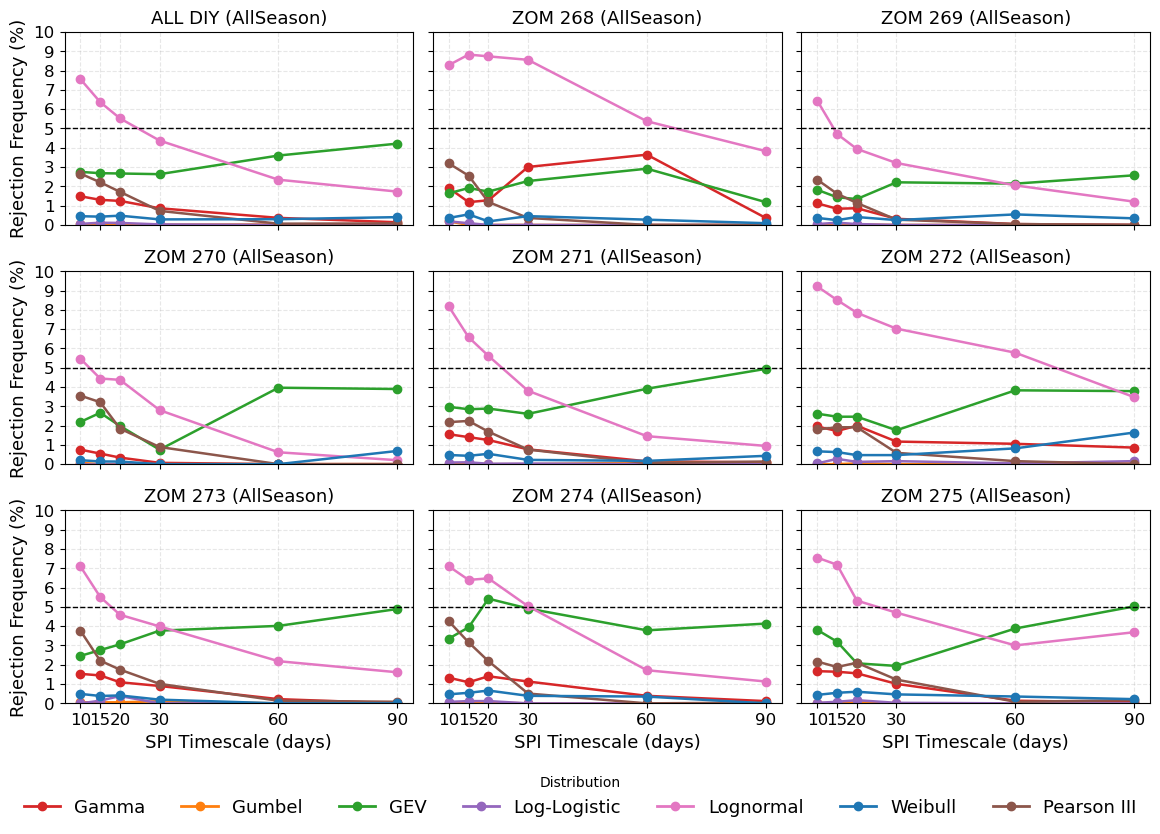

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Filter for season
season_name = "AllSeason"  # Change to "OktMar" or "AllSeason" as needed
df_season = summary_fail_fraction_seasoned.copy()
df_season["fail_percent"] = df_season["fraction_fail"] * 100
df_season = df_season[df_season["season"] == season_name]

# Add ZOM
station_to_zom = metadata["ZOM"].to_dict()
df_season["ZOM"] = df_season["station_id"].map(station_to_zom)

# ZOM list
zom_list = list(range(268, 276))

# Colors
dist_colors = {
    'wei': '#1f77b4',
    'gum': '#ff7f0e',
    'gev': '#2ca02c',
    'gam': '#d62728',
    'llg': '#9467bd',
    'pe3': '#8c564b',
    'lgn': '#e377c2',
}

# Nice labels
dist_labels = {
    'gam': "Gamma",
    'gum': "Gumbel",
    'gev': "GEV",
    'llg': "Log-Logistic",
    'lgn': "Lognormal",
    'wei': "Weibull",
    'pe3': "Pearson III",
}

# Grouping
df_grouped = (
    df_season.groupby(["ZOM", "distribution", "scale"])["fail_percent"]
            .mean()
            .reset_index()
)

# ALL DIY panel
df_all = (
    df_season.groupby(["distribution", "scale"])["fail_percent"]
             .mean()
             .reset_index()
)
df_all["ZOM"] = "ALL"

df_full = pd.concat([df_all, df_grouped], ignore_index=True)

# Create figure
fig, axes = plt.subplots(3, 3, figsize=(11.7, 8.3), sharex=True, sharey=True)
axes = axes.flatten()

panel_titles = ["ALL DIY"] + [f"ZOM {z}" for z in zom_list]

for i, title in enumerate(panel_titles):
    ax = axes[i]

    if title == "ALL DIY":
        df_plot = df_full[df_full["ZOM"] == "ALL"]
    else:
        zom_id = int(title.split()[1])
        df_plot = df_full[df_full["ZOM"] == zom_id]

    # Plot each distribution
    for dist in df_plot["distribution"].unique():
        sub = df_plot[df_plot["distribution"] == dist]

        ax.plot(
            sub["scale"],
            sub["fail_percent"],
            marker="o",
            linewidth=1.8,
            color=dist_colors[dist],
            label=dist_labels.get(dist, dist.upper())
        )

    # 5% threshold line
    ax.axhline(5, color="black", linestyle="--", linewidth=1)

    ax.set_title(f'{title} ({season_name})', fontsize=13)
    ax.grid(True, linestyle="--", alpha=0.3)
    ax.tick_params(labelsize=12)
    ax.set_xticks([10, 15, 20, 30, 60, 90])

    if i % 3 == 0:
        ax.set_ylabel("Rejection Frequency (%)", fontsize=13)
    if i >= 6:
        ax.set_xlabel("SPI Timescale (days)", fontsize=13)

    ax.set_ylim(0, 10)
    ax.set_yticks(np.arange(0, 11, 1))

# Unified legend
handles = [
    plt.Line2D([], [], color=dist_colors[key], marker="o", linewidth=2,
               label=dist_labels[key])
    for key in dist_labels.keys()
]

fig.legend(
    handles,
    dist_labels.values(),
    title="Distribution",
    loc="lower center",
    ncol=7,
    fontsize=13,
    frameon=False,
    bbox_to_anchor=(0.5, -0.01)
)

# fig.suptitle(f"Rejection Frequency — proportion of days with KS p-value < 0.05  ({season_name})", fontsize=14, y=0.98)
plt.tight_layout(rect=[0, 0.07, 1, 1])
plt.show()


/var/folders/9g/y4lb5z2j2jg8m_dmhp5c6bjh0000gn/T/ipykernel_1263/257988863.py:108: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0.08, 1, 1])


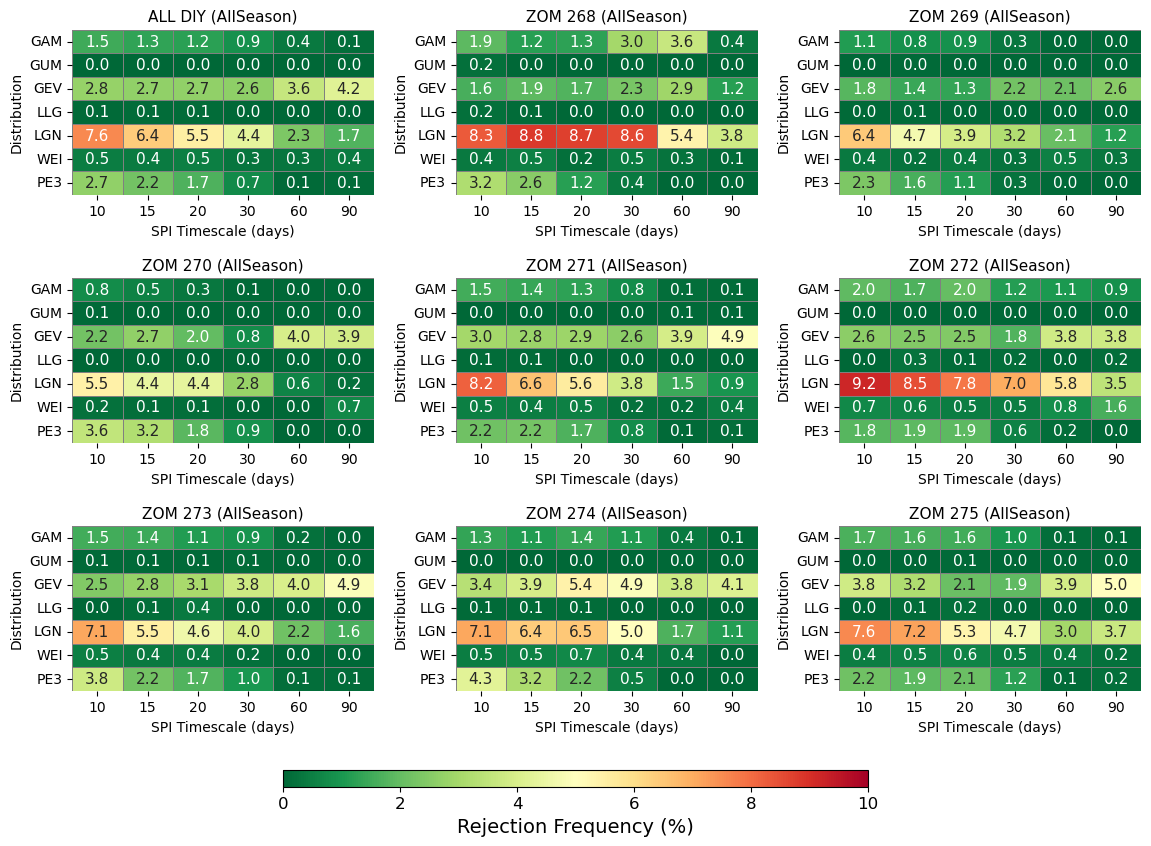

In [121]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# User option: choose season
season_name = "AllSeason"   # "AllSeason", "AprSep", or "OktMar"

# Prepare data
df_season = summary_fail_fraction_seasoned.copy()
df_season["fail_percent"] = df_season["fraction_fail"] * 100
df_season = df_season[df_season["season"] == season_name]

# Add ZOM information
station_to_zom = metadata["ZOM"].to_dict()
df_season["ZOM"] = df_season["station_id"].map(station_to_zom)

# ZOM list (8 panels)
zom_list = list(range(268, 276))

# Readable label for distributions
dist_labels = {
    'gam': "Gamma",
    'gum': "Gumbel",
    'gev': "GEV",
    'llg': "Log-Logistic",
    'lgn': "Lognormal",
    'wei': "Weibull",
    'pe3': "Pearson III",
}

# Compute mean rejection frequency
df_grouped = (
    df_season.groupby(["ZOM", "distribution", "scale"])["fail_percent"]
             .mean()
             .reset_index()
)

df_all = (
    df_season.groupby(["distribution", "scale"])["fail_percent"]
             .mean()
             .reset_index()
)
df_all["ZOM"] = "ALL"

df_full = pd.concat([df_all, df_grouped], ignore_index=True)

# Use distribution code (uppercase) as y-axis label
df_full["dist_code"] = df_full["distribution"].str.upper()


# Create figure
fig, axes = plt.subplots(3, 3, figsize=(11.7, 8.3), sharex=False, sharey=False)
axes = axes.flatten()

panel_titles = ["ALL DIY"] + [f"ZOM {z}" for z in zom_list]

# Color scale limits (0% – 10% is typical for KS rejection)
vmin, vmax = 0, 10

for i, title in enumerate(panel_titles):
    ax = axes[i]

    if title == "ALL DIY":
        df_plot = df_full[df_full["ZOM"] == "ALL"]
    else:
        zom_id = int(title.split()[1])
        df_plot = df_full[df_full["ZOM"] == zom_id]

    if df_plot.empty:
        ax.text(0.5, 0.5, "No data", ha="center", fontsize=10)
        ax.set_title(title)
        ax.axis("off")
        continue

    # Pivot for heatmap
    mat = df_plot.pivot(index="dist_code", columns="scale", values="fail_percent")

    # Reorder rows to standard distribution order
    ordered_dist = ["GAM", "GUM", "GEV", "LLG", "LGN", "WEI", "PE3"]
    mat = mat.reindex(ordered_dist)

    sns.heatmap(
        mat,
        ax=ax,
        vmin=vmin,
        vmax=vmax,
        cmap="RdYlGn_r",
        cbar=False,
        linewidths=0.5,
        linecolor="gray",
        annot=True,
        fmt=".1f",
        annot_kws={"fontsize": 11}
    )

    ax.set_title(f"{title} ({season_name})", fontsize=11)
    ax.set_xlabel("SPI Timescale (days)", fontsize=10)
    ax.set_ylabel("Distribution", fontsize=10)
    ax.tick_params(axis="both", labelsize=10)

# Add unified colorbar at the bottom
cbar_ax = fig.add_axes([0.25, 0.04, 0.5, 0.02])
norm = plt.Normalize(vmin=vmin, vmax=vmax)
sm = plt.cm.ScalarMappable(norm=norm, cmap="RdYlGn_r")
fig.colorbar(sm, cax=cbar_ax, orientation="horizontal", label="Rejection Frequency (%)")

plt.tight_layout(rect=[0, 0.08, 1, 1])
plt.show()


In [8]:
import pandas as pd
import numpy as np

# Choose season
season_name = "AllSeason"   # "AllSeason" or "OktMar"

# Copy seasonal failure fraction table
df = summary_fail_fraction_seasoned.copy()
df["fail_percent"] = df["fraction_fail"] * 100
df = df[df["season"] == season_name]

# Add ZOM info
station_to_zom = metadata["ZOM"].to_dict()
df["ZOM"] = df["station_id"].map(station_to_zom)

# List of ZOMs to include
zom_list = list(range(268, 276))

# all panels: ALL + 8 ZOM
panel_names = ["ALL"] + zom_list

# container for all tables
tables = {}

for panel in panel_names:

    if panel == "ALL":
        df_panel = df.copy()
    else:
        df_panel = df[df["ZOM"] == panel]

    # compute mean rejection fraction
    df_group = (
        df_panel.groupby(["distribution", "scale"])["fail_percent"]
                .mean()
                .reset_index()
    )

    # convert distribution code to uppercase for row label
    df_group["dist_code"] = df_group["distribution"].str.upper()

    # reshape into wide-form table (for heatmap)
    table = df_group.pivot(index="dist_code", columns="scale", values="fail_percent")

    # reorder distributions in standard listing
    ordered_dist = ["GAM", "GUM", "GEV", "LLG", "LGN", "WEI", "PE3"]
    table = table.reindex(ordered_dist)

    # sort columns (scales)
    table = table.reindex(sorted(table.columns), axis=1)

    # store inside dictionary
    tables[panel] = table

# save all tables into one Excel file
writer = pd.ExcelWriter(f"data/fitdist/heatmap_tables_rejection_{season_name}.xlsx")

for panel, tbl in tables.items():
    sheet = f"ALL" if panel == "ALL" else f"ZOM_{panel}"
    tbl.to_excel(writer, sheet_name=sheet)

writer.close()

print("Saved all heatmap tables to:")
print(f"data/fitdist/heatmap_tables_rejection_{season_name}.xlsx")

# Display ALL table to screen
display(tables["ALL"])


Saved all heatmap tables to:
data/fitdist/heatmap_tables_rejection_AllSeason.xlsx


scale            10        15        20        30        60        90
dist_code                                                            
GAM        1.486203  1.301139  1.245443  0.864177  0.366456  0.138228
GUM        0.027468  0.020633  0.024051  0.013797  0.024177  0.024177
GEV        2.750759  2.683165  2.667089  2.632278  3.597722  4.215949
LLG        0.055316  0.114304  0.103671  0.027468  0.003418  0.013797
LGN        7.561772  6.369873  5.524177  4.374937  2.345316  1.729367
WEI        0.453418  0.429367  0.480633  0.287342  0.297342  0.404430
PE3        2.661899  2.211392  1.715949  0.729620  0.065443  0.079494

In [9]:
# Dictionary to store AIC (log-likelihood) matrices loaded from Excel files
aic_dict = {}

for dist_name, _ in dist_list:
    for window in rolled_dict.keys():
        fname = f"data/fitdist/result/aic_loglik_{dist_name}_{window}.xlsx"
        try:
            df = pd.read_excel(fname)
            df = df.set_index("date")
            aic_dict[(dist_name, window)] = df
        except FileNotFoundError:
            print(f"⚠️ File not found: {fname}")

In [38]:
aic_dict['gam', 10]

34010101a   34010201a   34010202a   34010301a   34010401a  \
date                                                                     
2000-01-01  170.085536  169.231657  165.789779  163.776846  171.207461   
2000-01-02  171.434982  170.710480  166.232366  164.303449  172.419173   
2000-01-03  172.249409  171.144894  166.866518  165.215647  170.840141   
2000-01-04  171.232706  169.467561  166.538793  166.336341  170.756802   
2000-01-05  171.979086  167.066766  167.076035  166.368454  169.315176   
...                ...         ...         ...         ...         ...   
2000-12-27  168.944023  164.469763  174.827080  174.826489  182.605673   
2000-12-28  169.337963  164.130575  176.299363  174.300740  182.952962   
2000-12-29  169.570752  164.584925  176.917211  173.207290  182.801572   
2000-12-30  183.138260  180.184010  178.878941  177.927307  180.711566   
2000-12-31  179.921827  180.024002  179.582092  178.543843  182.700205   

             34010402a   34010501a   34010601a   34010701a   34010801a  ...  \
date                                                                    ...   
2000-01-01  160.024257  177.879130  161.229474  169.900508  158.875002  ...   
2000-01-02  162.986091  177.072262  163.188482  170.493513  173.491442  ...   
2000-01-03  163.012013  177.426312  164.196517  170.509048  174.851997  ...   
2000-01-04  165.398941  179.679012  161.496165  169.590723  176.188579  ...   
2000-01-05  163.957020  178.956917  162.907133  168.586669  174.557664  ...   
...                ...         ...         ...         ...         ...  ...   
2000-12-27  157.617348  184.275550  173.590979  177.561173  177.368912  ...   
2000-12-28  156.159867  187.092152  173.404637  176.780724  178.107387  ...   
2000-12-29  155.896745  187.141673  175.556451  177.215531  179.905243  ...   
2000-12-30  150.996036  187.680276  173.701271  177.539508  177.764714  ...   
2000-12-31  160.371642  191.289015  173.924536  179.005115  178.188340  ...   

             34041302a   34041303a   34041401a   34041501a   34041502a  \
date                                                                     
2000-01-01  161.665232  159.619495  160.102829  148.781508  163.738379   
2000-01-02  165.041122  167.008910  162.422203  159.881301  163.314227   
2000-01-03  165.323750  166.251405  161.777848  162.457521  164.995786   
2000-01-04  168.284479  168.254966  167.483221  169.994370  170.128539   
2000-01-05  168.553435  168.635616  168.884072  171.392705  173.802764   
...                ...         ...         ...         ...         ...   
2000-12-27  176.457837  182.914118  178.120326  181.258838  184.711086   
2000-12-28  177.813432  181.070518  177.039955  183.346750  185.924365   
2000-12-29  174.266263  181.428210  175.104163  179.854112  183.399663   
2000-12-30  172.312459  178.710630  170.477651  172.792664  177.035026   
2000-12-31  169.701217  171.400485  172.158942  163.810989  172.831867   

             34041504a   34041601a   34041701a   34041702a   34041704a  
date                                                                    
2000-01-01  159.657242  163.415973  164.818814  162.559224  169.879791  
2000-01-02  159.985797  162.776123  164.536615  164.707139  171.256233  
2000-01-03  158.596477  164.349375  168.010228  169.108164  172.102049  
2000-01-04  168.686123  171.804084  170.063569  169.814303  174.487247  
2000-01-05  171.178885  170.763676  169.813677  171.213757  173.436832  
...                ...         ...         ...         ...         ...  
2000-12-27  181.999478  172.729861  173.176812  175.645960  180.193157  
2000-12-28  182.435585  173.830037  173.729651  179.099910  179.656737  
2000-12-29  175.135632  173.145991  175.063311  179.659771  177.556561  
2000-12-30  171.624129  172.132883  176.563975  178.012721  180.285449  
2000-12-31  165.946777  170.044616  174.507014  172.020261  179.072014  

[366 rows x 79 columns]

In [10]:
import pandas as pd

# Load the table containing the optimal distribution results
hasil = pd.read_excel("data/fitdist/hasil_distribusi_optimal_complete.xlsx")

# Load station metadata if available
# The metadata file must contain columns: ID, station name, and ZOM classification
metadata_pos = pd.read_excel('data/metadata_10%_79pos_2010-01-01.xlsx')
metadata_pos = metadata_pos.rename(columns={"Pos Hujan ID": "Pos"})

# Convert the table into a pivoted format where each row represents one station
# and each SPI timescale becomes a separate column showing the selected distribution
pivot_best = (
    hasil.pivot_table(
        index="Pos",
        columns="Skala",
        values="BestDist",
        aggfunc="first"
    )
    .rename(columns=lambda x: f"dist_spi{x}")
    .reset_index()
)

# Merge the pivoted table with station metadata (if available)
summary_dist = pivot_best.merge(
    metadata_pos[["Pos", "Nama Stasiun", "ZOM"]],
    on="Pos",
    how="left"
)

# Reorder columns to place metadata fields first, followed by SPI distribution columns
ordered_cols = ["Pos", "Nama Stasiun", "ZOM"] + [
    c for c in summary_dist.columns if c.startswith("dist_spi")
]
summary_dist = summary_dist[ordered_cols]

print("\nSummary of optimal distributions per station:")
print(summary_dist.head())

# Save output to Excel
summary_dist.to_excel(
    "data/fitdist/ringkasan_distribusi_optimal_per_stasiun.xlsx",
    index=False
)


Summary of optimal distributions per station:
         Pos  Nama Stasiun  ZOM dist_spi10 dist_spi15 dist_spi20 dist_spi30  \
0  34010101a     BPP Temon  273        wei        wei        wei        wei   
1  34010201a          Beji  273        gum        gum        wei        wei   
2  34010202a   BPP Kulwaru  273        wei        wei        wei        wei   
3  34010301a  BPP Panjatan  273        wei        wei        wei        wei   
4  34010401a   PSDA Brosot  273        gum        wei        wei        gam   

  dist_spi60 dist_spi90  
0        gam        wei  
1        gum        wei  
2        wei        wei  
3        wei        gum  
4        gam        gam  


In [11]:
import pandas as pd
import numpy as np

# Load the table containing optimal distribution results and corresponding ΔAIC values
hasil = pd.read_excel("data/fitdist/hasil_distribusi_optimal_complete.xlsx")

# List of ΔAIC columns for all candidate distributions
delta_cols = [
    "DeltaAIC_gam", "DeltaAIC_wei", "DeltaAIC_gum",
    "DeltaAIC_pe3", "DeltaAIC_gev", "DeltaAIC_llg", "DeltaAIC_lgn"
]

def get_second_best_delta(row):
    """Return the ΔAIC difference between the best and second-best distributions."""
    values = row[delta_cols].values.astype(float)
    sorted_vals = np.sort(values)
    return sorted_vals[1] - sorted_vals[0]

# Compute the ΔAIC gap for each station and SPI timescale
hasil["deltaAIC_best_vs_second"] = hasil.apply(get_second_best_delta, axis=1)

# Build a clean summary table
delta_summary = hasil[["Pos", "Skala", "BestDist", "deltaAIC_best_vs_second"]].copy()
delta_summary = delta_summary.rename(columns={
    "Pos": "station_id",
    "Skala": "scale",
    "BestDist": "best_dist"
})

print("\nΔAIC summary:")
print(delta_summary.head())

# Save the summary table
delta_summary.to_excel("data/fitdist/rangkuman_deltaAIC_per_stasiun.xlsx", index=False)



ΔAIC summary:
  station_id  scale best_dist  deltaAIC_best_vs_second
0  34010101a     10       wei                 0.262414
1  34010201a     10       gum                 0.035358
2  34010202a     10       wei                 0.524742
3  34010301a     10       wei                 0.270511
4  34010401a     10       gum                 0.176375


In [12]:
import pandas as pd

# Load the table containing distribution proportions for each ZOM, scale, and season
prop = pd.read_excel("data/fitdist/proporsi_distribusi_perZOM_perMusim.xlsx")

# Map raw distribution names to standardized percentage column names
dist_cols_map = {
    "wei": "WEI_pct",
    "gum": "GUM_pct",
    "gev": "GEV_pct",
    "gam": "GAM_pct",
    "llg": "LLG_pct",
    "pe3": "PE3_pct",
    "lgn": "LGN_pct"
}

# Rename distribution columns to cleaner, consistent percentage labels
prop_clean = prop.rename(columns=dist_cols_map)

# Ensure all expected distribution columns exist; if missing, create and fill with zeros
for col in dist_cols_map.values():
    if col not in prop_clean.columns:
        prop_clean[col] = 0

# Select and order the output columns
output_cols = ["ZOM", "Skala", "Musim"] + list(dist_cols_map.values())
prop_clean = prop_clean[output_cols].fillna(0)

# Sort rows by ZOM, SPI scale, and season for a structured summary
prop_clean = prop_clean.sort_values(["ZOM", "Skala", "Musim"]).reset_index(drop=True)

print("\nDistribution proportion per ZOM per season:")
print(prop_clean.head())

# Export the cleaned summary table
prop_clean.to_excel("data/fitdist/proporsi_perZOM_perMusim_clean.xlsx", index=False)



Distribution proportion per ZOM per season:
   ZOM  Skala      Musim    WEI_pct     GUM_pct  GEV_pct  GAM_pct  LLG_pct  \
0  268     10  AllSeason   0.000000  100.000000      0.0      0.0        0   
1  268     10     AprSep  66.666667   33.333333      0.0      0.0        0   
2  268     10     OctMar   0.000000  100.000000      0.0      0.0        0   
3  268     15  AllSeason   0.000000  100.000000      0.0      0.0        0   
4  268     15     AprSep  66.666667   33.333333      0.0      0.0        0   

   PE3_pct  LGN_pct  
0      0.0        0  
1      0.0        0  
2      0.0        0  
3      0.0        0  
4      0.0        0  


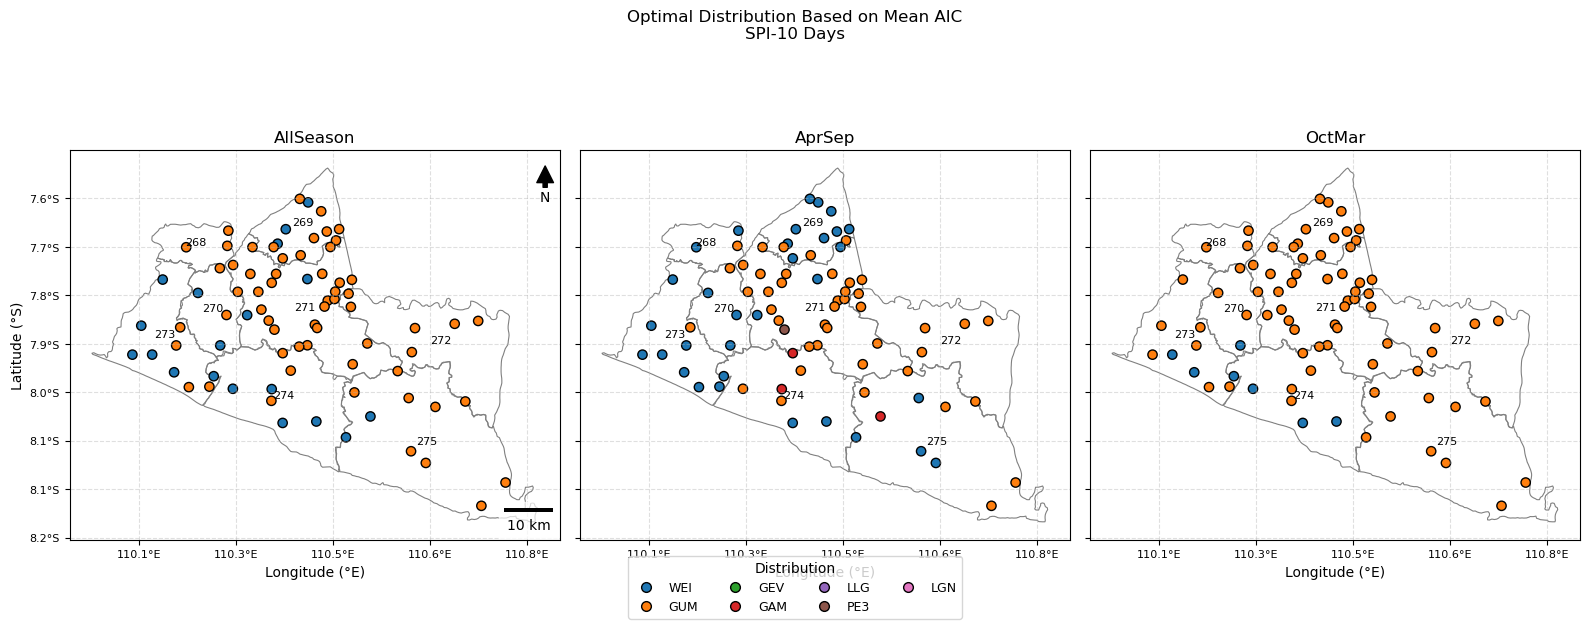

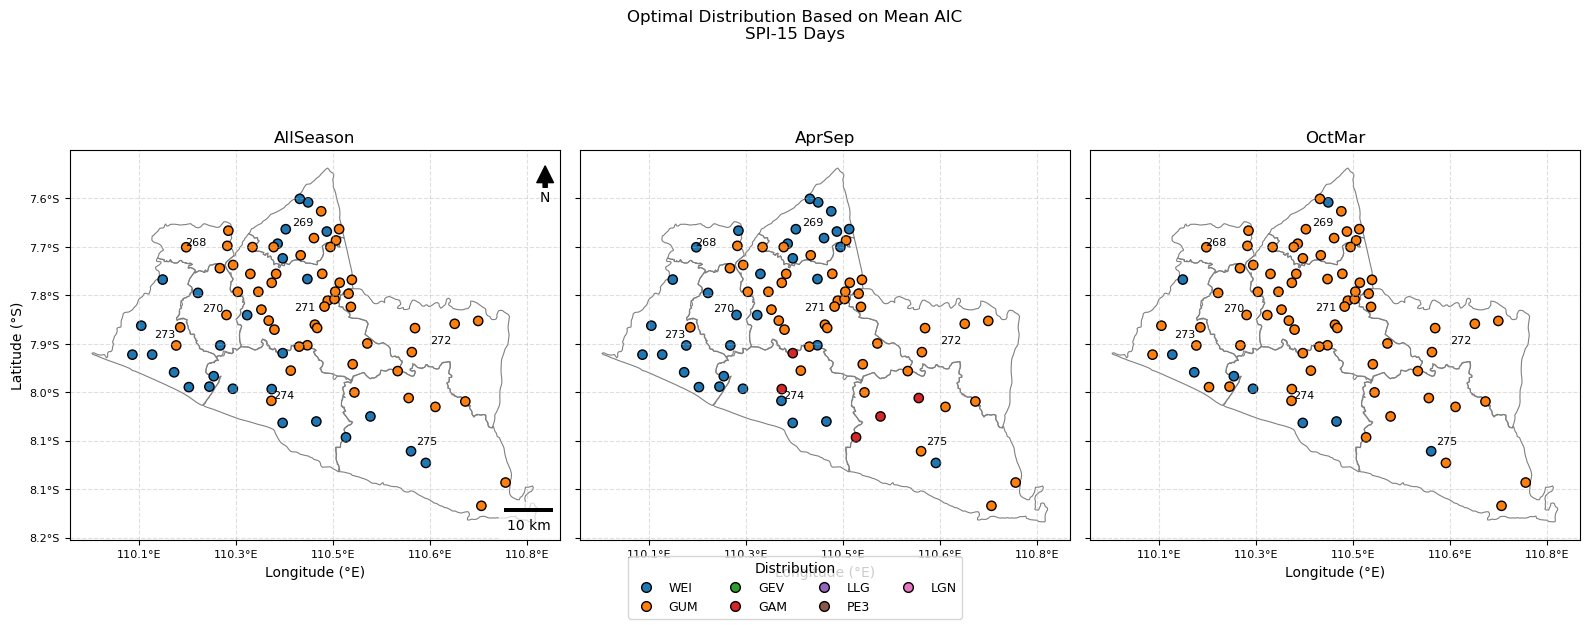

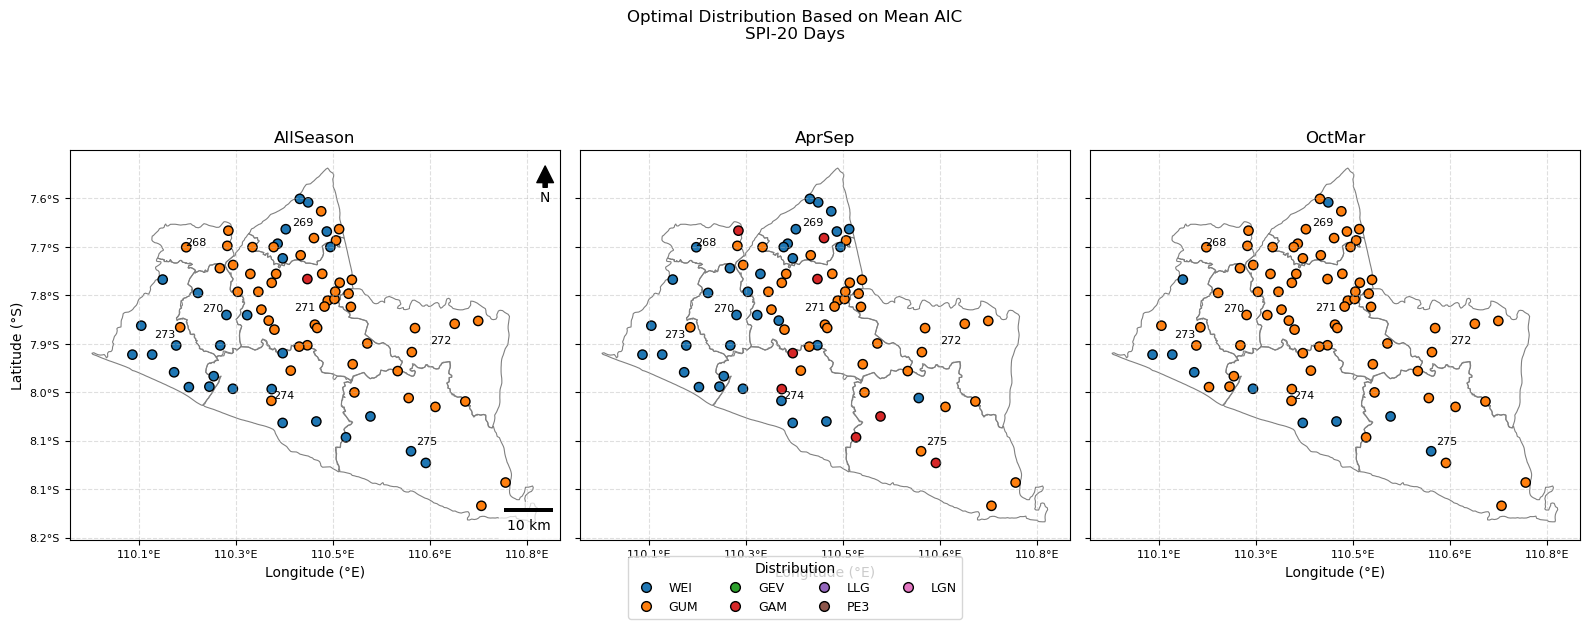

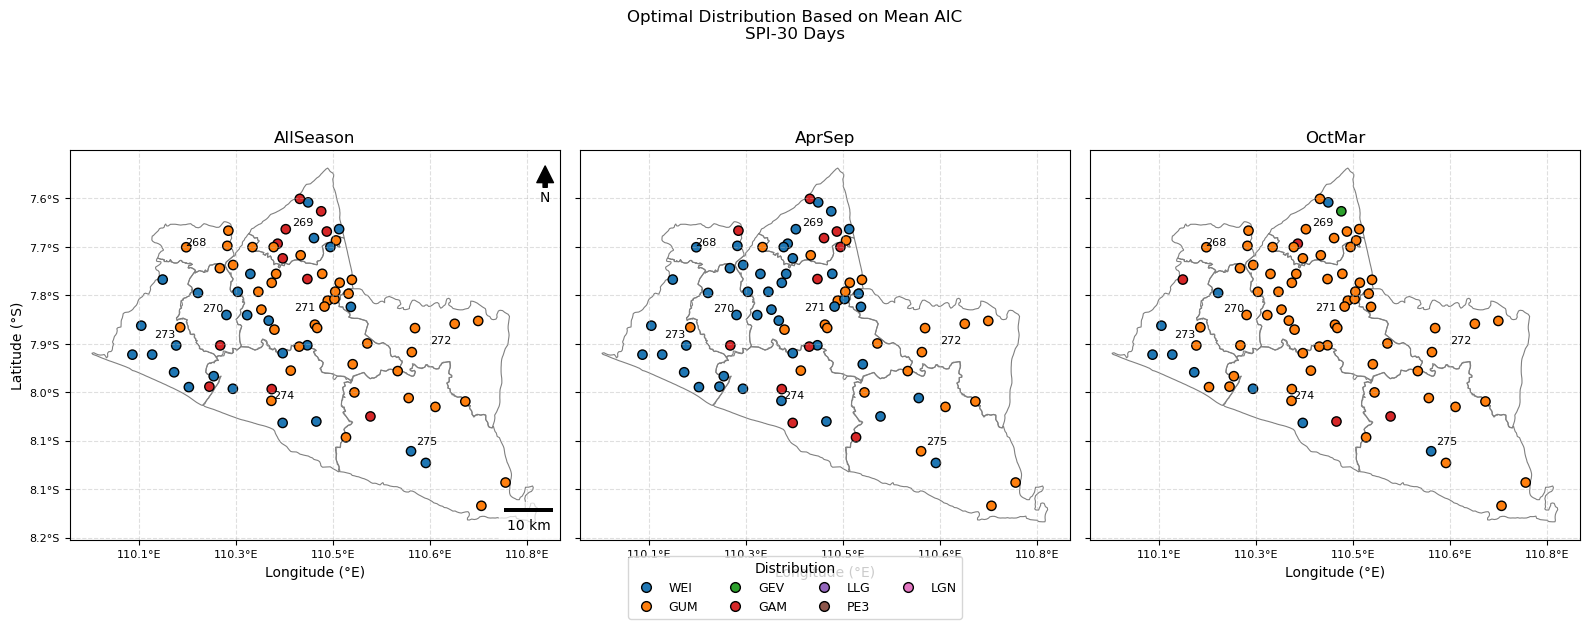

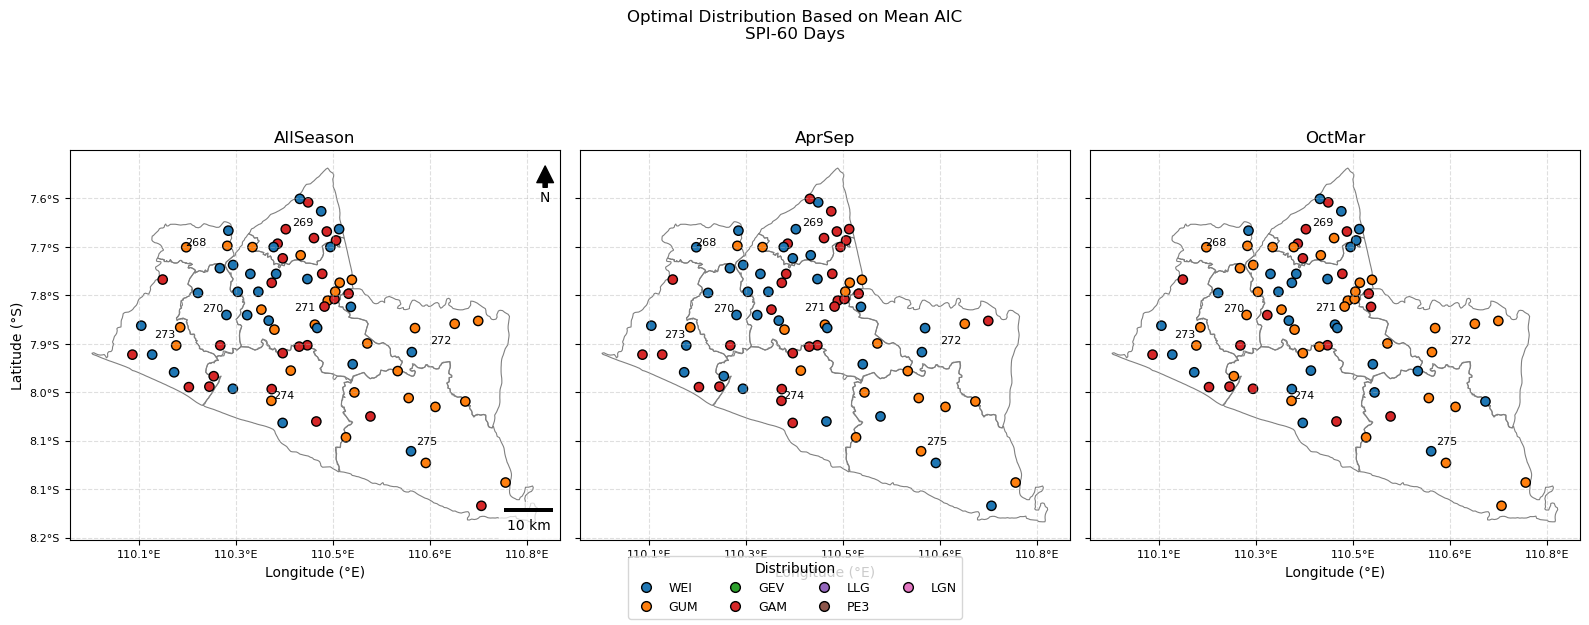

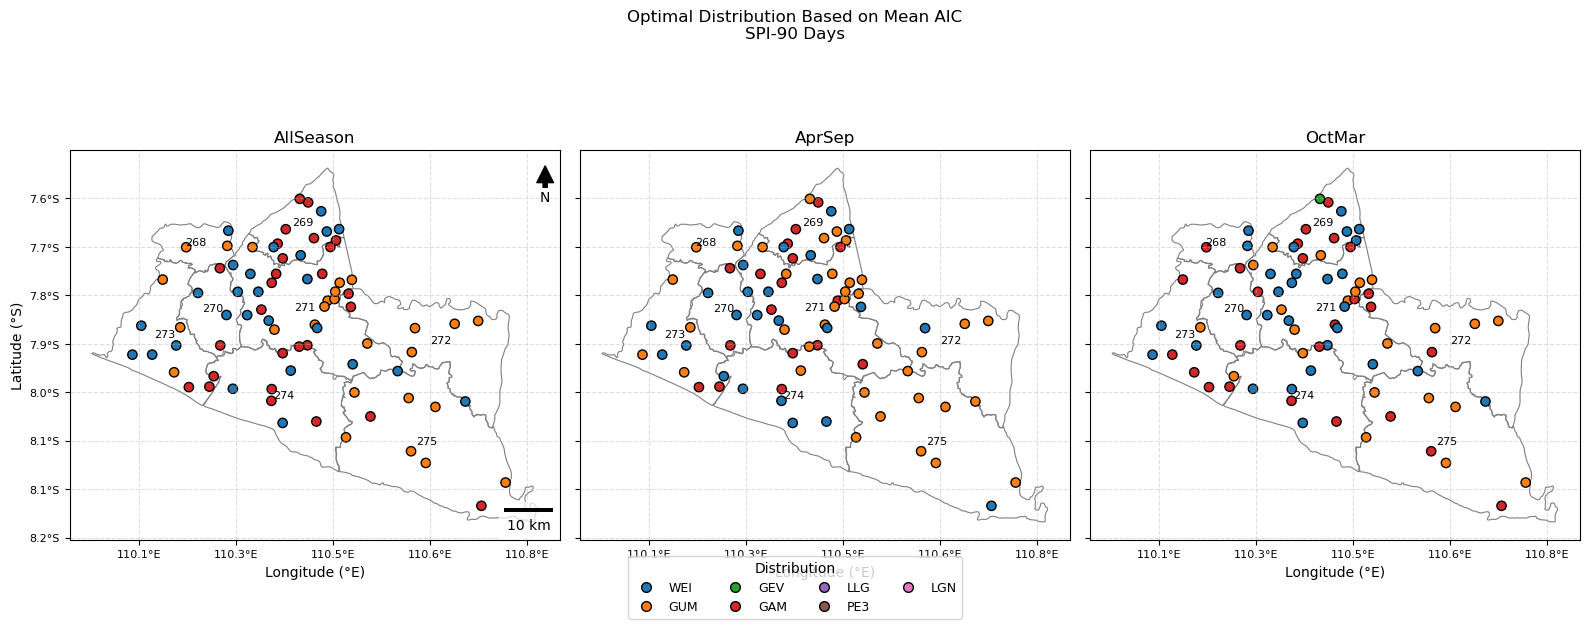

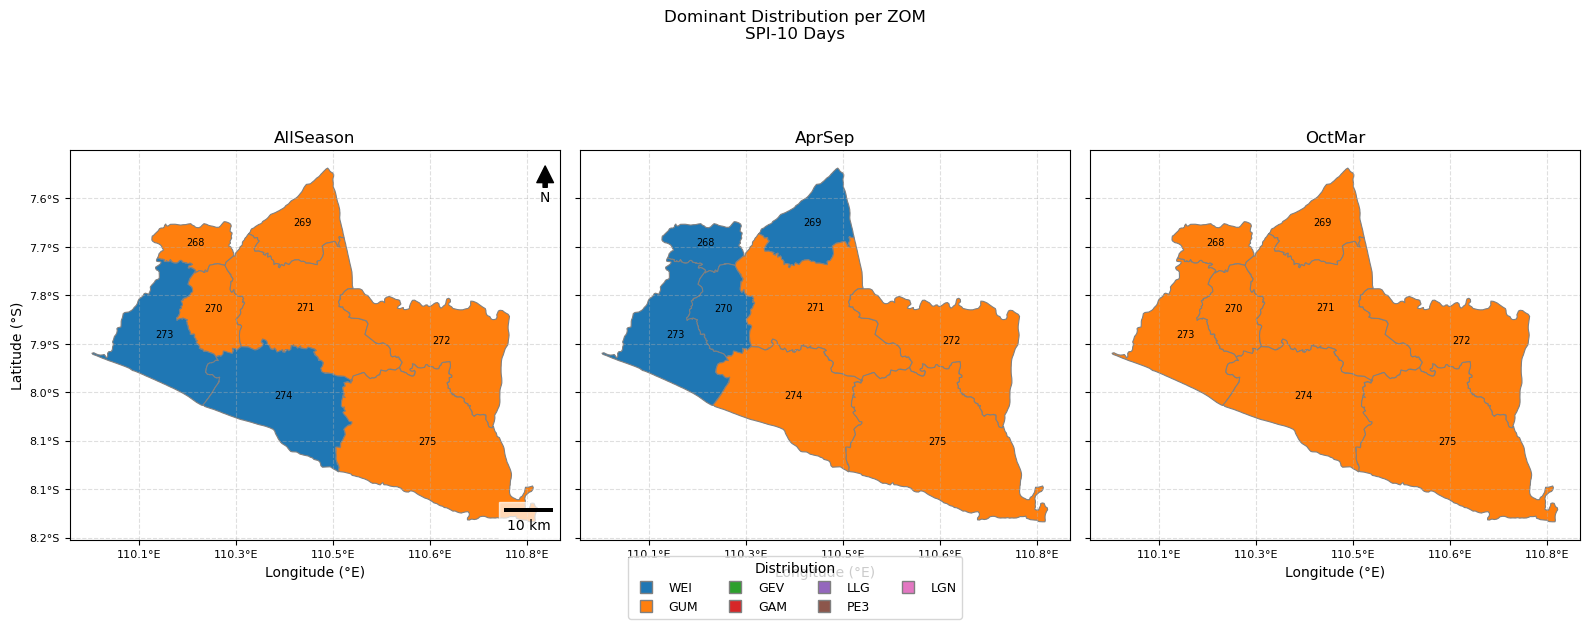

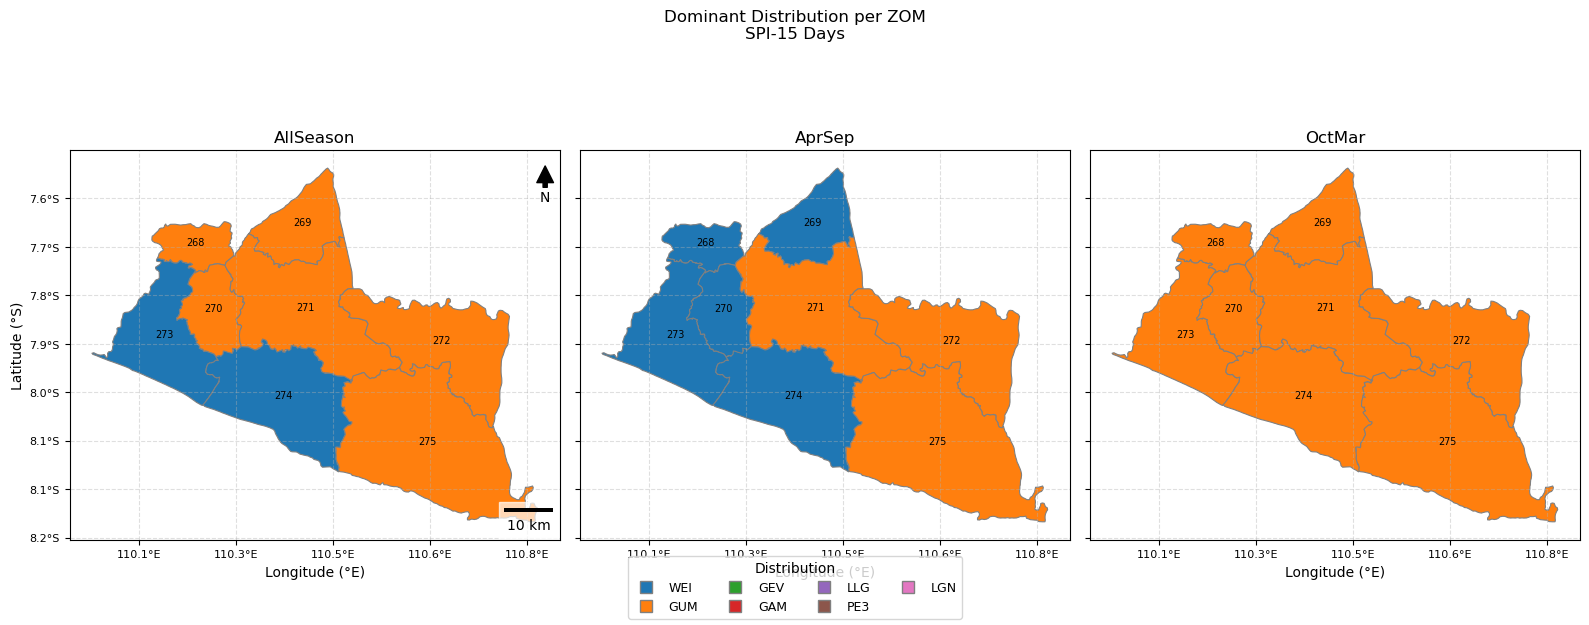

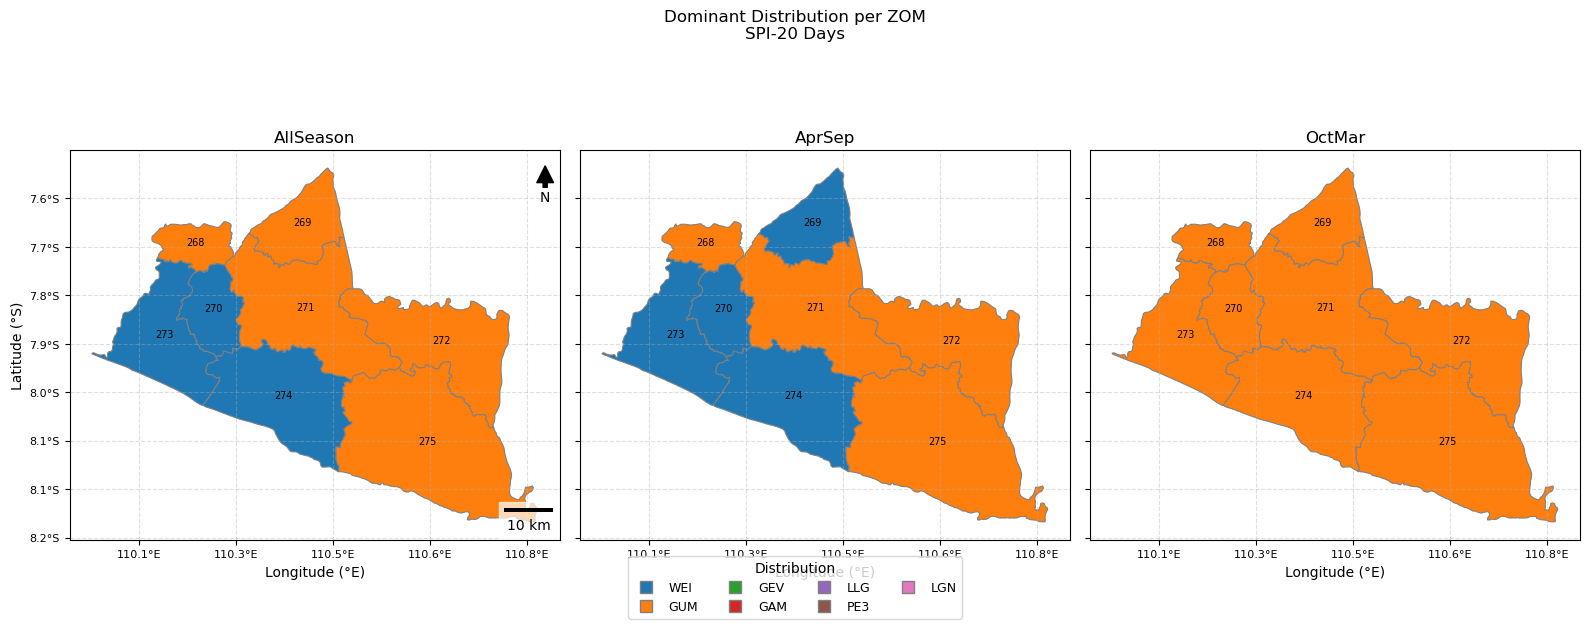

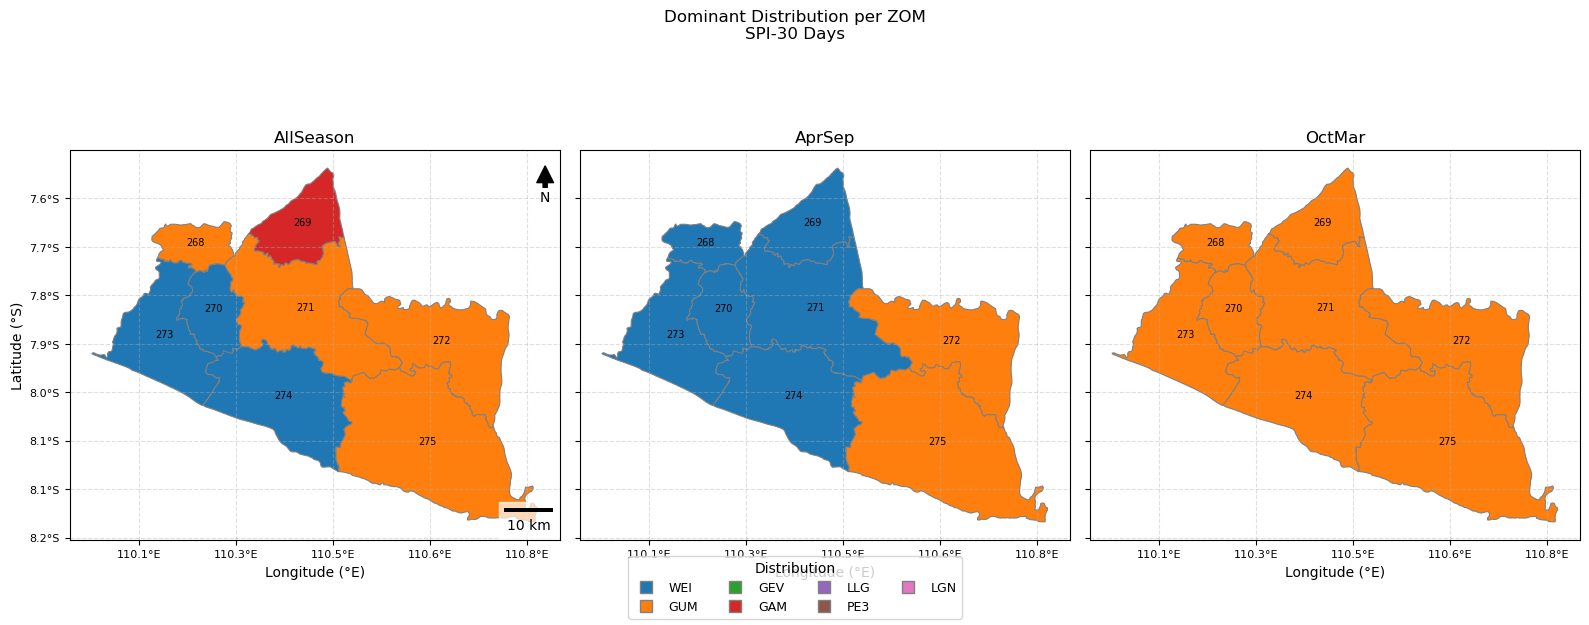

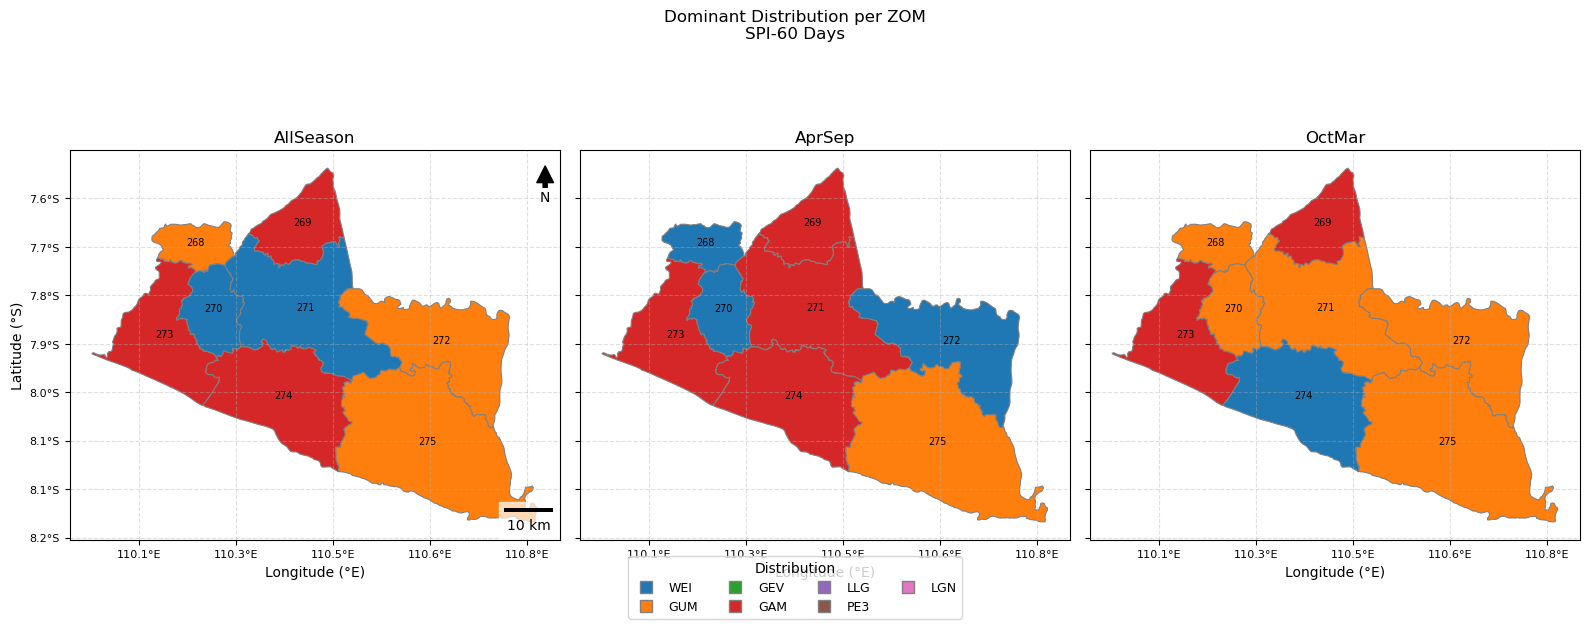

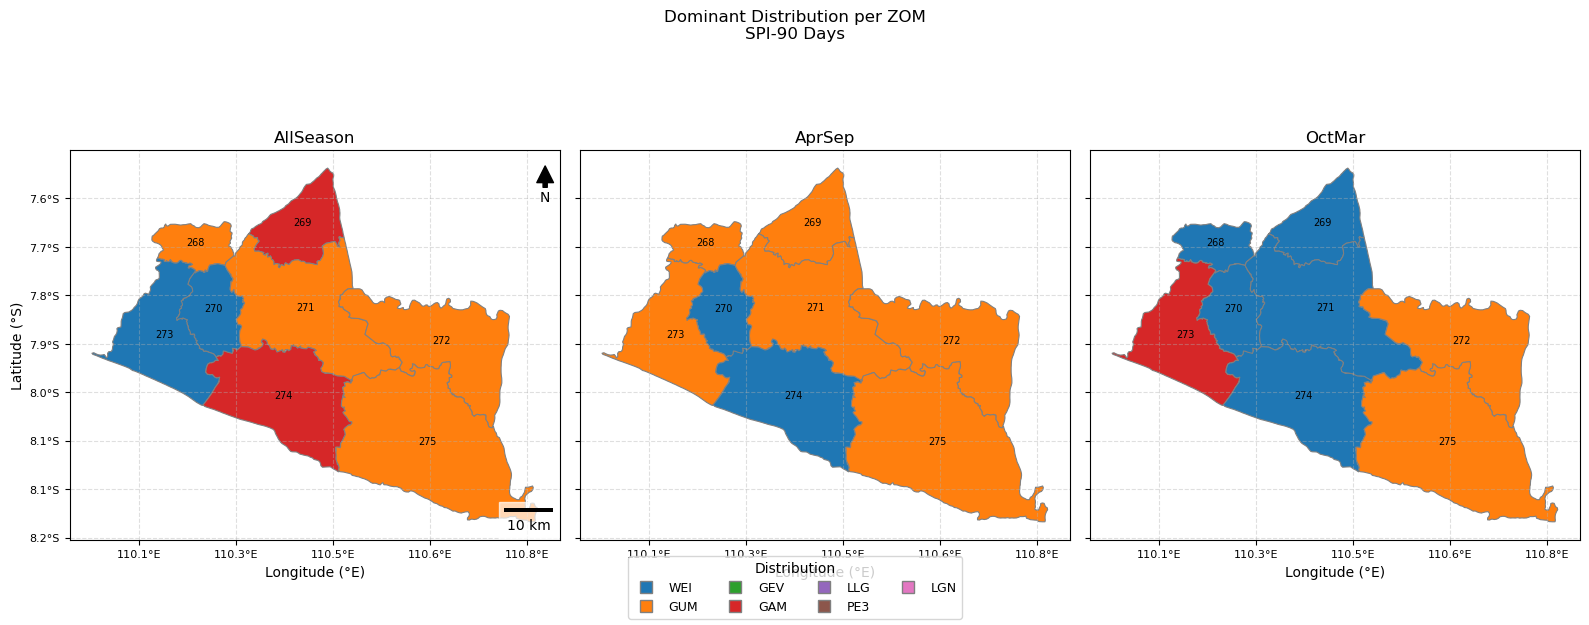

Output saved: data/fitdist/proporsi_distribusi_perZOM_perMusim.xlsx


In [13]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib_scalebar.scalebar import ScaleBar
from matplotlib import ticker as mticker
from pyproj import Transformer
import numpy as np
import matplotlib.colors as mcolors

# Metadata: index = station ID, columns include Lintang/Bujur

# Load ZOM boundary shapefile (UTM zone 49S)
shp_zom = gpd.read_file("ZOM9120_DIY.shp").to_crs("EPSG:32749")

# Color map for each distribution
dist_colors = {
    'wei': '#1f77b4',
    'gum': '#ff7f0e',
    'gev': '#2ca02c',
    'gam': '#d62728',
    'llg': '#9467bd',
    'pe3': '#8c564b',
    'lgn': '#e377c2',
}

# Filter dataframe by season
def season_mask(df, season_name):
    if season_name == "AprSep":
        return df[(df.index.month >= 4) & (df.index.month <= 9)]
    elif season_name == "OctMar":
        return df[(df.index.month >= 10) | (df.index.month <= 3)]
    return df

# Add north arrow to axis
def add_north_arrow(ax, x=0.97, y=0.88, size=0.08):
    ax.annotate('N', xy=(x, y + size), xytext=(x, y),
                arrowprops=dict(facecolor='black', width=3, headwidth=12),
                ha='center', va='center', fontsize=10,
                xycoords=ax.transAxes)

records = []
seasons = ["AllSeason", "AprSep", "OctMar"]

# Compute best distribution for each station, scale, and season
for scale in rolled_dict.keys():
    for season_name in seasons:
        aic_summary = {}

        for dist_name, dist_obj in dist_list:
            aic_df = aic_dict.get((dist_name, scale))
            pv_df  = pv_dict.get((dist_name, scale))
            if aic_df is None or pv_df is None:
                continue

            if not isinstance(aic_df.index, pd.DatetimeIndex):
                aic_df.index = pd.to_datetime(aic_df.index)

            aic_sub = season_mask(aic_df, season_name)
            pv_sub  = season_mask(pv_df, season_name)

            mean_aic = aic_sub.mean(axis=0, skipna=True)
            mean_pv  = pv_sub.mean(axis=0, skipna=True)

            df_temp = pd.DataFrame({
                'Pos': mean_aic.index,
                'mean_AIC': mean_aic.values,
                'mean_p_value': mean_pv.values,
                'Distribusi': dist_name,
                'Skala': scale,
                'Musim': season_name
            })

            df_temp = df_temp[df_temp['mean_p_value'] > 0.05]
            if not df_temp.empty:
                aic_summary[dist_name] = df_temp.set_index('Pos')['mean_AIC']

        if not aic_summary:
            print(f"⚠️ No valid distribution (p > 0.05) for {season_name} scale {scale}")
            continue

        all_aic_df = pd.DataFrame(aic_summary)
        aic_min = all_aic_df.min(axis=1)
        delta_aic_df = all_aic_df.subtract(aic_min, axis=0)

        # Number of parameters per distribution
        param_complexity = {
            'wei': 2,
            'gum': 2,
            'gam': 2,
            'lgn': 2,
            'llg': 2,
            'gev': 3,
            'pe3': 3,
        }

        # Distribution selection rule (parsimony + ΔAIC)
        def choose_best_distribution(delta_row):
            best_raw = delta_row.idxmin()
            if param_complexity[best_raw] == 2:
                return best_raw

            candidates_2param = [
                d for d, val in delta_row.items()
                if param_complexity[d] == 2 and val < 2
            ]
            if candidates_2param:
                return min(candidates_2param, key=lambda d: delta_row[d])

            return best_raw

        best_dist = delta_aic_df.apply(choose_best_distribution, axis=1)
        best_deltaAIC = delta_aic_df.min(axis=1)
        deltaAIC_close = delta_aic_df.apply(lambda row: row[row < 2].index.tolist(), axis=1)

        df_best = pd.DataFrame({
            'Pos': delta_aic_df.index,
            'BestDist': best_dist.values,
            'DeltaAIC_best': best_deltaAIC.values,
            'AIC_min': aic_min.values,
            'Distribusi_DeltaAIC_<2': deltaAIC_close.values,
            'Skala': scale,
            'Musim': season_name
        })

        for dist_name in delta_aic_df.columns:
            df_best[f'DeltaAIC_{dist_name}'] = delta_aic_df[dist_name].values

        records.append(df_best)

# Combine all results
result_df = pd.concat(records, ignore_index=True)
result_df = result_df.merge(metadata[['Lintang', 'Bujur']], left_on='Pos', right_index=True, how='left')
result_df = result_df.dropna(subset=['Lintang', 'Bujur', 'BestDist'])
result_df.to_excel("data/fitdist/hasil_distribusi_optimal_complete.xlsx", index=False)

# Convert to GeoDataFrame (UTM zone 49S)
gdf = gpd.GeoDataFrame(
    result_df,
    geometry=gpd.points_from_xy(result_df['Bujur'], result_df['Lintang']),
    crs='EPSG:4326'
).to_crs("EPSG:32749")

# Coordinate formatter
transformer = Transformer.from_crs("EPSG:32749", "EPSG:4326", always_xy=True)
def utm_to_deg_x(x, pos):
    lon, lat = transformer.transform(x, ax.get_ylim()[0])
    return f"{lon:.1f}°E"
def utm_to_deg_y(y, pos):
    lon, lat = transformer.transform(ax.get_xlim()[0], y)
    return f"{abs(lat):.1f}°S"

# Visualization: three panels per scale
scales = sorted(gdf['Skala'].unique())
for scale in scales:
    fig, axes = plt.subplots(1, 3, figsize=(16, 6), sharex=True, sharey=True)
    plt.subplots_adjust(wspace=0.05)

    for i, season in enumerate(seasons):
        ax = axes[i]
        ax.set_aspect('equal')

        subset = gdf[(gdf['Skala'] == scale) & (gdf['Musim'] == season)].copy()
        if subset.empty:
            ax.set_title(f"{season}\n(no data)")
            ax.axis('off')
            continue

        subset['Color'] = subset['BestDist'].map(dist_colors).fillna('lightgray')
        shp_zom.plot(ax=ax, color='none', edgecolor='gray', linewidth=0.8)

        for _, row in shp_zom.iterrows():
            if not row.geometry.is_empty:
                x, y = row.geometry.centroid.coords[0]
                ax.text(x, y, row['ZOM'], fontsize=8, ha='center')

        subset.plot(ax=ax, color=subset['Color'], markersize=45, edgecolor='black')
        ax.set_title(season)
        ax.grid(True, linestyle='--', alpha=0.4)
        ax.xaxis.set_major_formatter(mticker.FuncFormatter(utm_to_deg_x))
        ax.yaxis.set_major_formatter(mticker.FuncFormatter(utm_to_deg_y))
        ax.tick_params(axis='both', labelsize=8)

        if i == 0:
            scalebar = ScaleBar(dx=1, units="m", dimension="si-length",
                                location='lower right', box_alpha=0.7,
                                length_fraction=0.1, pad=0.4)
            ax.add_artist(scalebar)
            add_north_arrow(ax)
            ax.set_ylabel("Latitude (°S)")
        ax.set_xlabel("Longitude (°E)")

    handles = [
        plt.Line2D([0], [0], marker='o', color='w',
                   markerfacecolor=c, markeredgecolor='black',
                   markersize=7, label=d.upper())
        for d, c in dist_colors.items()
    ]
    fig.legend(handles=handles, title="Distribution", loc='lower center', ncol=4, fontsize=9)
    fig.suptitle(f"Optimal Distribution Based on Mean AIC\nSPI-{scale} Days", fontsize=12, y=1.02)
    plt.tight_layout(rect=[0, 0.05, 1, 0.95])
    plt.show()

# Compute dominant distribution proportions per ZOM and season
if 'ZOM' not in shp_zom.columns:
    raise ValueError("Column 'ZOM' not found in ZOM shapefile.")

joined = gpd.sjoin(gdf, shp_zom[['ZOM', 'geometry']], how='left', predicate='within')
prop_list = []

for scale in sorted(joined['Skala'].unique()):
    for season in seasons:
        subset = joined[(joined['Skala'] == scale) & (joined['Musim'] == season)]
        if subset.empty:
            continue

        crosstab = pd.crosstab(subset['ZOM'], subset['BestDist'], normalize='index') * 100
        crosstab['ZOM'] = crosstab.index
        crosstab['Skala'] = scale
        crosstab['Musim'] = season
        prop_list.append(crosstab.reset_index(drop=True))

df_prop = pd.concat(prop_list, ignore_index=True)
df_prop.to_excel("data/fitdist/proporsi_distribusi_perZOM_perMusim.xlsx", index=False)

# Visualization: dominant distribution per ZOM
for scale in sorted(df_prop['Skala'].unique()):
    fig, axes = plt.subplots(1, 3, figsize=(16, 6), sharex=True, sharey=True)
    plt.subplots_adjust(wspace=0.05)

    for i, season in enumerate(seasons):
        ax = axes[i]
        ax.set_aspect('equal')

        subset = df_prop[(df_prop['Skala'] == scale) & (df_prop['Musim'] == season)].copy()
        if subset.empty:
            ax.set_title(f"{season}\n(no data)")
            ax.axis('off')
            continue

        dist_cols = [c for c in subset.columns if c not in ['ZOM', 'Skala', 'Musim'] and pd.api.types.is_numeric_dtype(subset[c])]
        subset['Dominan'] = subset[dist_cols].idxmax(axis=1)
        subset['Proporsi'] = subset[dist_cols].max(axis=1)

        zom_plot = shp_zom.merge(subset[['ZOM', 'Dominan', 'Proporsi']], on='ZOM', how='left')
        zom_plot.plot(ax=ax, color=zom_plot['Dominan'].map(dist_colors), edgecolor='gray', linewidth=0.8)

        for _, row in zom_plot.iterrows():
            if not row.geometry.is_empty:
                x, y = row.geometry.centroid.coords[0]
                ax.text(x, y, str(row['ZOM']), fontsize=7, ha='center')

        ax.set_title(season)
        ax.grid(True, linestyle='--', alpha=0.4)
        ax.xaxis.set_major_formatter(mticker.FuncFormatter(utm_to_deg_x))
        ax.yaxis.set_major_formatter(mticker.FuncFormatter(utm_to_deg_y))
        ax.tick_params(axis='both', labelsize=8)

        if i == 0:
            scalebar = ScaleBar(dx=1, units="m", dimension="si-length",
                                location='lower right', box_alpha=0.7,
                                length_fraction=0.1, pad=0.4)
            ax.add_artist(scalebar)
            add_north_arrow(ax)
            ax.set_ylabel("Latitude (°S)")
        ax.set_xlabel("Longitude (°E)")

    handles = [
        plt.Line2D([0], [0], marker='s', color='w',
                   markerfacecolor=color, markeredgecolor='gray',
                   markersize=9, label=dist.upper())
        for dist, color in dist_colors.items()
    ]
    fig.legend(handles=handles, title="Distribution", loc='lower center', ncol=4, fontsize=9)
    fig.suptitle(f"Dominant Distribution per ZOM\nSPI-{scale} Days", fontsize=12, y=1.02)
    plt.tight_layout(rect=[0, 0.05, 1, 0.95])
    plt.show()

print("Output saved: data/fitdist/proporsi_distribusi_perZOM_perMusim.xlsx")


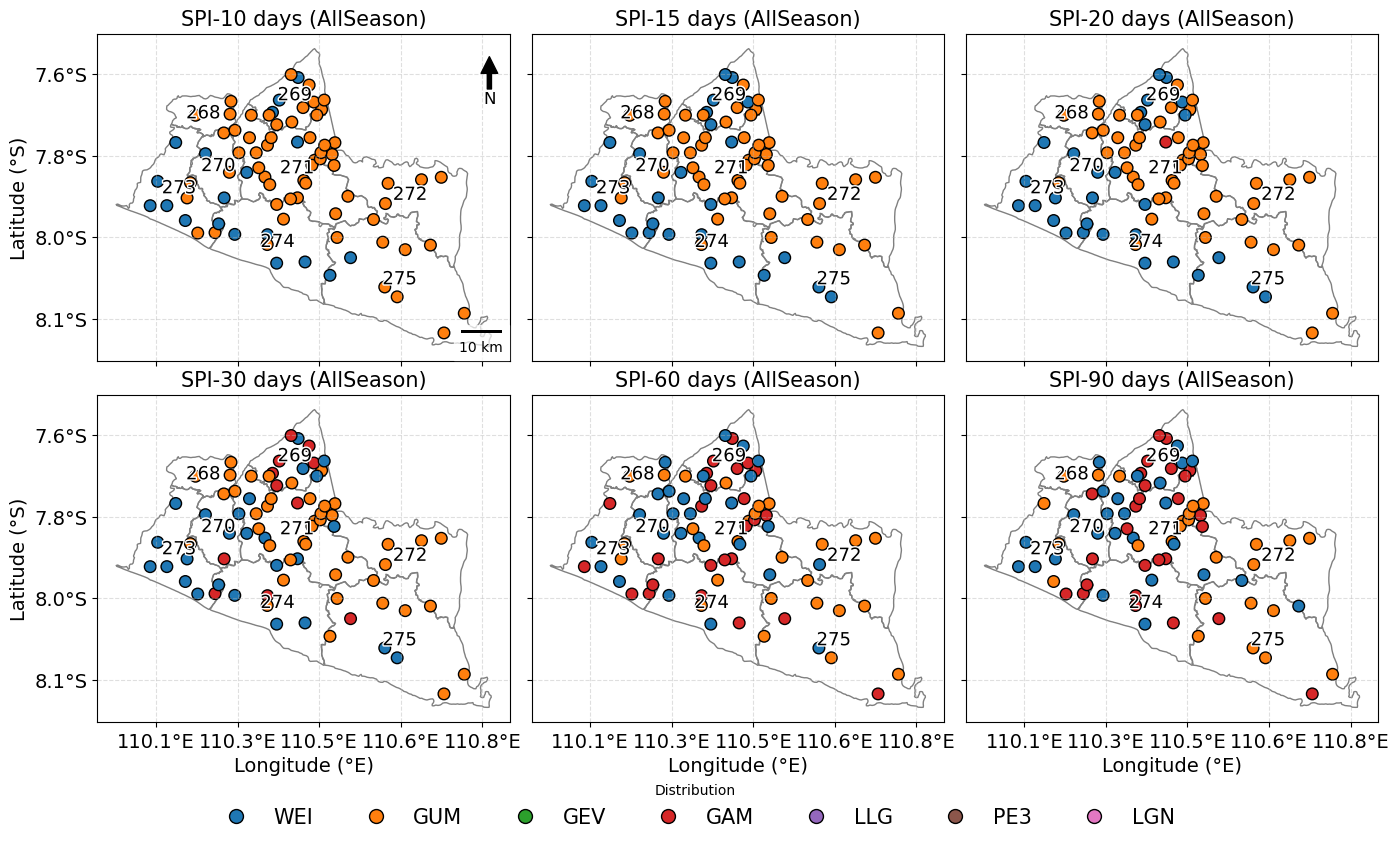

In [30]:
import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd
from matplotlib_scalebar.scalebar import ScaleBar
from matplotlib import ticker as mticker
from pyproj import Transformer
from shapely.geometry import Point

# Filter dataset to include only AllSeason results
gdf_all = gdf[gdf['Musim'] == "AllSeason"].copy()

# Sorted list of SPI timescales for AllSeason
scales = sorted(gdf_all['Skala'].unique())

# Layout for 6 panels (2 rows × 3 columns)
nrows, ncols = 2, 3
fig, axes = plt.subplots(nrows, ncols, figsize=(14, 8.75), sharex=True, sharey=True)
plt.subplots_adjust(hspace=0.2)

axes = axes.flatten()

# Coordinate transformer to convert UTM (EPSG:32749) into geographic degrees
transformer = Transformer.from_crs("EPSG:32749", "EPSG:4326", always_xy=True)

def utm_to_deg_x(x, pos):
    """Format X-axis ticks from UTM easting to degrees longitude."""
    lon, lat = transformer.transform(x, ax.get_ylim()[0])
    return f"{lon:.1f}°E"

def utm_to_deg_y(y, pos):
    """Format Y-axis ticks from UTM northing to degrees latitude."""
    lon, lat = transformer.transform(ax.get_xlim()[0], y)
    return f"{abs(lat):.1f}°S"


# Helper: place ZOM labels with slight offsets to reduce overlap
def plot_zom_labels(ax, gdf_zom):
    """Plot ZOM labels with position offsets to reduce overlap."""
    for idx, row in gdf_zom.iterrows():
        if row.geometry.is_empty:
            continue
        
        # Base centroid
        cx, cy = row.geometry.centroid.coords[0]

        # Add small offset based on ZOM ID (so labels spread a bit)
        cx_offset = cx + (idx % 2) * 350   # shift ±350 m
        cy_offset = cy + (idx % 3) * 350

        ax.text(
            cx_offset, cy_offset,
            row['ZOM'],
            fontsize=13,
            ha='center',
            va='center',
            color='black',
            path_effects=[                   # Add white halo (better visibility)
                plt.matplotlib.patheffects.Stroke(linewidth=2, foreground='white'),
                plt.matplotlib.patheffects.Normal()
            ]
        )


# Plot each panel
for i, scale in enumerate(scales[:6]):
    ax = axes[i]
    ax.set_aspect('equal')

    subset = gdf_all[gdf_all['Skala'] == scale].copy()
    if subset.empty:
        ax.set_title(f"SPI-{scale} (no data)")
        ax.axis('off')
        continue

    subset["Color"] = subset["BestDist"].map(dist_colors).fillna("lightgray")

    # Plot ZOM boundaries
    shp_zom.plot(ax=ax, color='none', edgecolor='gray', linewidth=1.0)

    # Plot ZOM labels with improved readability
    plot_zom_labels(ax, shp_zom)

    # Plot rainfall stations
    subset.plot(ax=ax, color=subset["Color"], markersize=70, edgecolor="black")

    ax.set_title(f"SPI-{scale} days (AllSeason)", fontsize=15)
    ax.grid(True, linestyle="--", alpha=0.4)

    ax.xaxis.set_major_formatter(mticker.FuncFormatter(utm_to_deg_x))
    ax.yaxis.set_major_formatter(mticker.FuncFormatter(utm_to_deg_y))
    ax.tick_params(axis="both", labelsize=14)

    ax.set_xlabel("Longitude (°E)", fontsize=14)
    if i >= 3:
        ax.set_xlabel("Longitude (°E)", fontsize=14)
    else:
        ax.set_xlabel("")     
        ax.set_xticklabels([])

    if i % 3 == 0:
        ax.set_ylabel("Latitude (°S)", fontsize=14)

    # Add scalebar and north arrow to the first panel only
    if i == 0:
        scalebar = ScaleBar(
            dx=1,
            units="m",
            dimension="si-length",
            location='lower right',
            box_alpha=0.7,
            length_fraction=0.12,
            pad=0.4
        )
        ax.add_artist(scalebar)

        ax.annotate(
            'N',
            xy=(0.95, 0.93),
            xytext=(0.95, 0.8),
            arrowprops=dict(facecolor='black', width=3, headwidth=12),
            ha='center',
            va='center',
            fontsize=12,
            xycoords=ax.transAxes
        )

# Global legend (bottom center)
handles = [
    plt.Line2D(
        [0], [0], marker='o', color='w',
        markerfacecolor=color, markeredgecolor='black',
        markersize=10, label=dist.upper()
    )
    for dist, color in dist_colors.items()
]

fig.legend(
    handles=handles,
    title="Distribution",
    loc='lower center',
    ncol=7,
    fontsize=15,
    frameon=False,
    bbox_to_anchor=(0.5, -0.02)
)

# fig.suptitle("Optimal Probability Distribution Based on ΔAIC (AllSeason)", fontsize=14, y=0.95)
plt.tight_layout(rect=[0, 0.05, 1, 0.95])
plt.show()


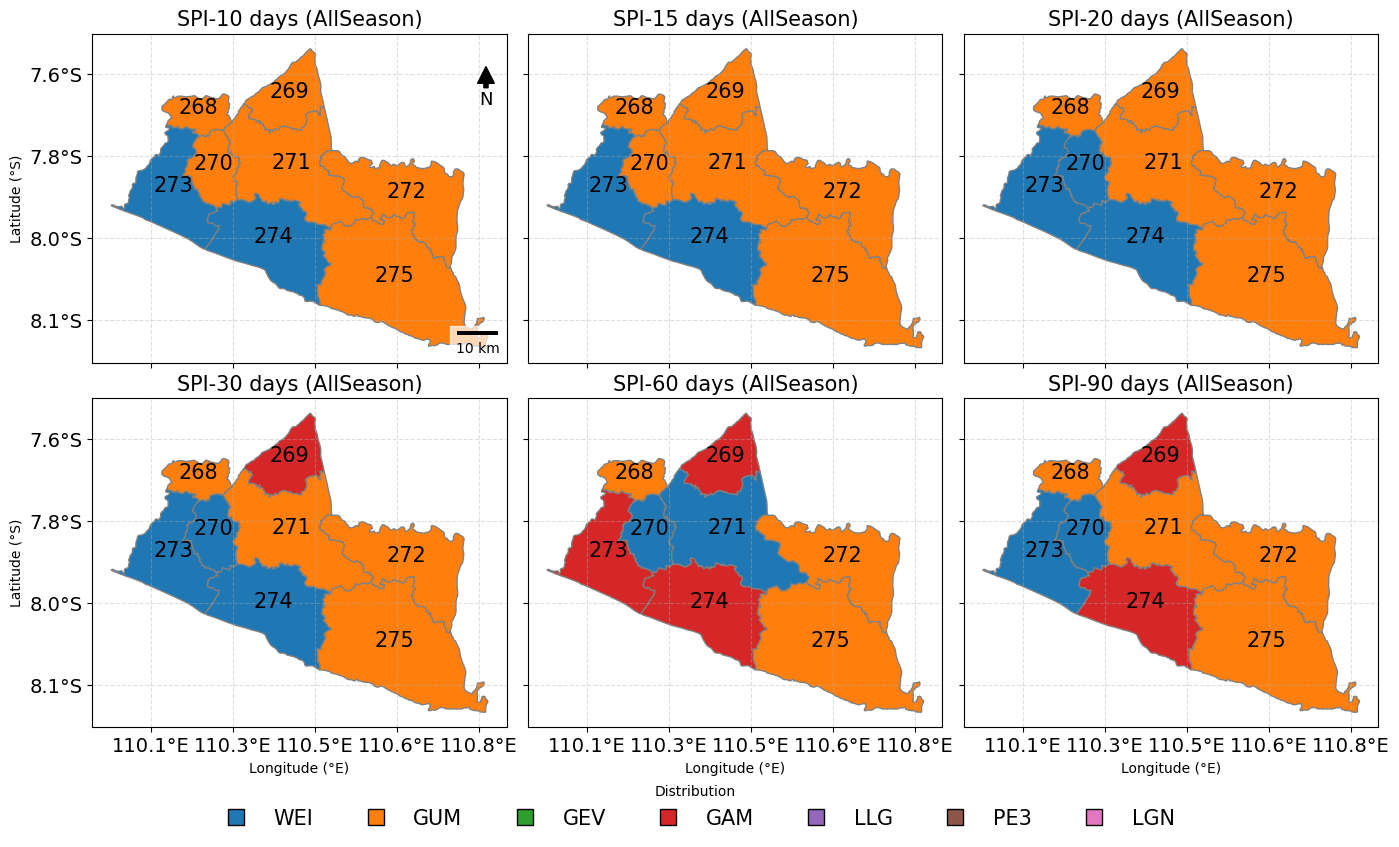

In [31]:
import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd
from matplotlib_scalebar.scalebar import ScaleBar
from matplotlib import ticker as mticker
from pyproj import Transformer

# Load ZOM-level distribution proportions
df_prop = pd.read_excel("data/fitdist/proporsi_distribusi_perZOM_perMusim.xlsx")

# Identify distribution columns (numeric only)
dist_cols = [c for c in df_prop.columns if c not in ["ZOM", "Skala", "Musim"]]

# Compute dominant distribution and its proportion
df_prop["Dominan"] = df_prop[dist_cols].idxmax(axis=1)
df_prop["Proporsi"] = df_prop[dist_cols].max(axis=1)

# Convert ZOM column to string in both tables to avoid merge dtype conflict
df_prop["ZOM"] = df_prop["ZOM"].astype(str)
zom_map = shp_zom.to_crs("EPSG:32749").copy()
zom_map["ZOM"] = zom_map["ZOM"].astype(str)

# Filter only AllSeason results
df_zom_all = df_prop[df_prop["Musim"] == "AllSeason"].copy()
df_zom_all["ZOM"] = df_zom_all["ZOM"].astype(str)

# Extract all SPI accumulation timescales
scales = sorted(df_zom_all["Skala"].unique())

# Create a 2×3 figure layout (6 panels)
nrows, ncols = 2, 3
fig, axes = plt.subplots(nrows, ncols, figsize=(14, 8.75), sharex=True, sharey=True)
axes = axes.flatten()

# Coordinate transformer (UTM → degrees)
transformer = Transformer.from_crs("EPSG:32749", "EPSG:4326", always_xy=True)

def utm_to_deg_x(x, pos):
    """Convert UTM easting to geographic longitude."""
    lon, lat = transformer.transform(x, ax.get_ylim()[0])
    return f"{lon:.1f}°E"

def utm_to_deg_y(y, pos):
    """Convert UTM northing to geographic latitude."""
    lon, lat = transformer.transform(ax.get_xlim()[0], y)
    return f"{abs(lat):.1f}°S"

# Plot each SPI timescale panel (SPI 10 to 90 days)
for i, scale in enumerate(scales[:6]):
    ax = axes[i]
    ax.set_aspect('equal')

    # Extract dominant distribution for this timescale
    subset = df_zom_all[df_zom_all["Skala"] == scale].copy()
    if subset.empty:
        ax.set_title(f"SPI-{scale} (no data)")
        ax.axis("off")
        continue

    # Merge ZOM polygons with dominant distribution table
    zom_plot = zom_map.merge(subset[["ZOM", "Dominan"]], on="ZOM", how="left")
    zom_plot["Color"] = zom_plot["Dominan"].map(dist_colors).fillna("lightgray")

    # Draw ZOM polygons colored by dominant distribution
    zom_plot.plot(ax=ax, color=zom_plot["Color"], edgecolor="gray", linewidth=1.0)

    # Label each ZOM at its centroid
    for _, row in zom_plot.iterrows():
        if not row.geometry.is_empty:
            cx, cy = row.geometry.centroid.coords[0]
            ax.text(cx, cy, str(row["ZOM"]), fontsize=15, ha="center")

    ax.set_title(f"SPI-{scale} days (AllSeason)", fontsize=15)
    ax.grid(True, linestyle="--", alpha=0.4)

    # Format axes in degrees
    ax.xaxis.set_major_formatter(mticker.FuncFormatter(utm_to_deg_x))
    ax.yaxis.set_major_formatter(mticker.FuncFormatter(utm_to_deg_y))
    ax.tick_params(axis="both", labelsize=14)

    # Show x-axis label only on second row
    if i >= 3:
        ax.set_xlabel("Longitude (°E)")
    else:
        ax.set_xlabel("")
        ax.set_xticklabels([])

    # Show y-axis label only on left column
    if i % 3 == 0:
        ax.set_ylabel("Latitude (°S)")

    # Add scalebar and north arrow only on first panel
    if i == 0:
        scalebar = ScaleBar(
            dx=1, units="m", dimension="si-length",
            location="lower right", box_alpha=0.7,
            length_fraction=0.12, pad=0.4
        )
        ax.add_artist(scalebar)

        ax.annotate(
            "N",
            xy=(0.95, 0.9),
            xytext=(0.95, 0.8),
            arrowprops=dict(facecolor="black", width=3, headwidth=12),
            ha="center",
            va="center",
            fontsize=13,
            xycoords=ax.transAxes
        )

# Global legend
handles = [
    plt.Line2D(
        [0], [0], marker="s", color="w",
        markerfacecolor=color, markeredgecolor="black",
        markersize=12, label=dist.upper()
    )
    for dist, color in dist_colors.items()
]

fig.legend(
    handles=handles,
    title="Distribution",
    loc="lower center",
    ncol=7,
    fontsize=15,
    frameon=False,
    bbox_to_anchor=(0.5, -0.02)
)

# fig.suptitle("Dominant Probability Distribution per ZOM — AllSeason", fontsize=13, y=0.95)

plt.subplots_adjust(hspace=0.55)
plt.tight_layout(rect=[0, 0.05, 1, 0.95])
plt.show()


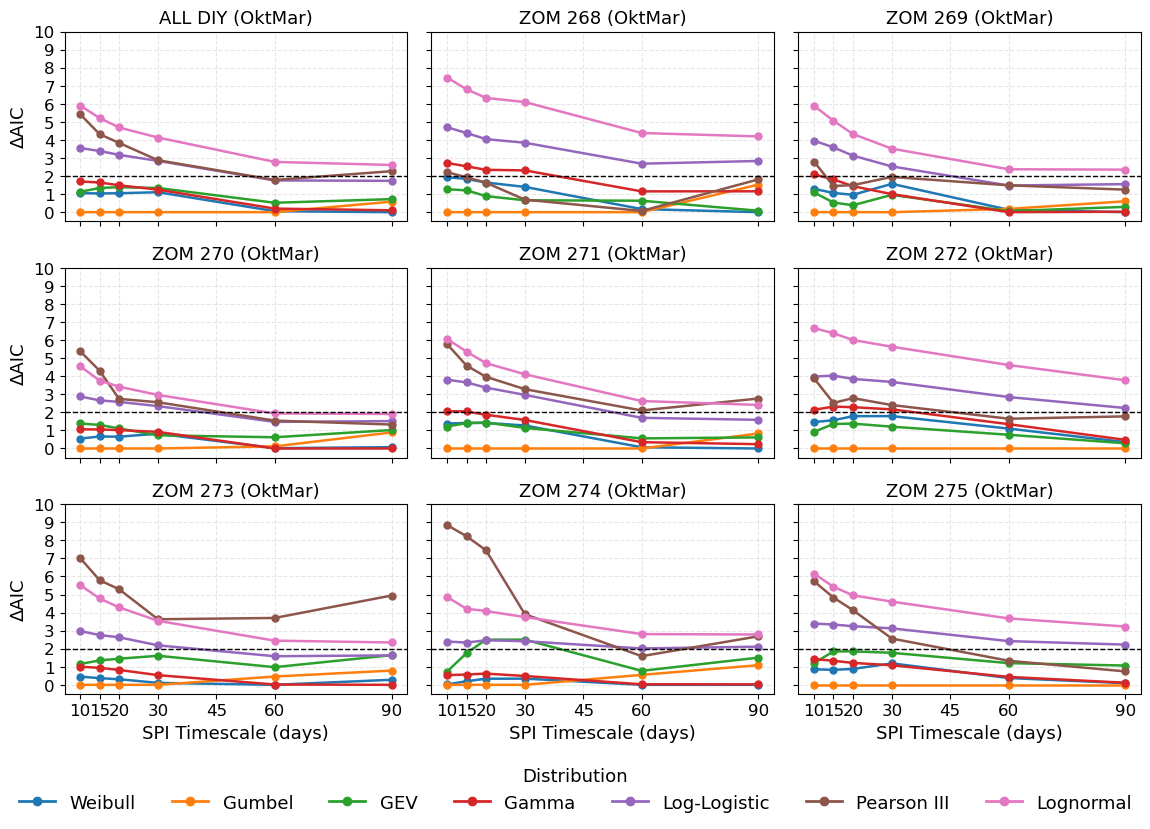

In [161]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Distributions are defined in a fixed order so the plotting, colors,
# and legend all remain consistent across the entire notebook.
dist_order = ['wei', 'gum', 'gev', 'gam', 'llg', 'pe3', 'lgn']

dist_colors = {
    'wei': '#1f77b4',
    'gum': '#ff7f0e',
    'gev': '#2ca02c',
    'gam': '#d62728',
    'llg': '#9467bd',
    'pe3': '#8c564b',
    'lgn': '#e377c2',
}

dist_labels = {
    'wei': "Weibull",
    'gum': "Gumbel",
    'gev': "GEV",
    'gam': "Gamma",
    'llg': "Log-Logistic",
    'pe3': "Pearson III",
    'lgn': "Lognormal",
}

valid_scales = [10, 15, 20, 30, 45, 60, 90]

# Seasonal masks based on datetime index
def season_mask(idx):
    months = idx.month
    mask_aprsep = months.isin([4,5,6,7,8,9])
    mask_oktmar = months.isin([10,11,12,1,2,3])
    return mask_aprsep, mask_oktmar

# Helper for computing seasonal AIC means
def compute_aic_season(df, mask):
    df2 = df.loc[mask]
    if df2.empty:
        return None
    return df2.mean().mean()

# Build AIC table for ALL DIY including seasonal AIC
rows = []

for scale in rolled_dict.keys():
    if scale not in valid_scales:
        continue

    for dist_name in dist_order:
        aic_df = aic_dict.get((dist_name, scale))
        if aic_df is None:
            continue

        if not isinstance(aic_df.index, pd.DatetimeIndex):
            try:
                aic_df.index = pd.to_datetime(aic_df.index, errors='coerce')
            except:
                pass

        mask_aprsep, mask_oktmar = season_mask(aic_df.index)

        mean_all = aic_df.mean().mean()
        mean_aprsep = compute_aic_season(aic_df, mask_aprsep)
        mean_oktmar = compute_aic_season(aic_df, mask_oktmar)

        rows.append({"distribution": dist_name,
                     "scale": scale,
                     "season": "AllSeason",
                     "mean_aic": mean_all})

        if mean_aprsep is not None:
            rows.append({"distribution": dist_name,
                         "scale": scale,
                         "season": "AprSep",
                         "mean_aic": mean_aprsep})

        if mean_oktmar is not None:
            rows.append({"distribution": dist_name,
                         "scale": scale,
                         "season": "OktMar",
                         "mean_aic": mean_oktmar})

df_aic = pd.DataFrame(rows)

# Compute ΔAIC for each season and timescale
df_aic["delta_aic"] = df_aic.groupby(["season","scale"])["mean_aic"].transform(
    lambda x: x - x.min()
)

# Compute ZOM-level seasonal AIC
def compute_zom_aic_season(zom_code):
    pos_in_zom = metadata.loc[metadata["ZOM"] == zom_code].index.tolist()
    rows = []

    for scale in rolled_dict.keys():
        if scale not in valid_scales:
            continue

        for dist_name in dist_order:
            aic_df = aic_dict.get((dist_name, scale))
            if aic_df is None:
                continue

            cols = [c for c in aic_df.columns if c in pos_in_zom]
            if len(cols) == 0:
                continue

            df = aic_df[cols]

            if not isinstance(df.index, pd.DatetimeIndex):
                try:
                    df.index = pd.to_datetime(df.index, errors='coerce')
                except:
                    pass

            mask_aprsep, mask_oktmar = season_mask(df.index)

            mean_all = df.mean().mean()
            mean_aprsep = compute_aic_season(df, mask_aprsep)
            mean_oktmar = compute_aic_season(df, mask_oktmar)

            rows.append({"season":"AllSeason","distribution":dist_name,
                         "scale":scale,"mean_aic":mean_all})

            if mean_aprsep is not None:
                rows.append({"season":"AprSep","distribution":dist_name,
                             "scale":scale,"mean_aic":mean_aprsep})

            if mean_oktmar is not None:
                rows.append({"season":"OktMar","distribution":dist_name,
                             "scale":scale,"mean_aic":mean_oktmar})

    if not rows:
        return None

    df = pd.DataFrame(rows)
    df["delta_aic"] = df.groupby(["season","scale"])["mean_aic"].transform(
        lambda x: x - x.min()
    )
    return df

# Prepare ZOM AIC dictionary
zom_list = sorted(metadata["ZOM"].dropna().unique())[:8]
zom_aic_dict = {z: compute_zom_aic_season(z) for z in zom_list}

# Select season to plot
season_to_plot = "OktMar"   # or "AprSep" or "OktMar"

# Build 3×3 figure panels
fig, axes = plt.subplots(3, 3, figsize=(11.7, 8.3), sharex=True, sharey=True)
axes = axes.flatten()

panel_titles = ["ALL DIY"] + [f"ZOM {z}" for z in zom_list]

for i, title in enumerate(panel_titles):
    ax = axes[i]

    if title == "ALL DIY":
        df_plot = df_aic[df_aic["season"] == season_to_plot].copy()
    else:
        zom_id = int(title.split()[1])
        df_plot = zom_aic_dict[zom_id]
        if df_plot is not None:
            df_plot = df_plot[df_plot["season"] == season_to_plot]

    if df_plot is None or df_plot.empty:
        ax.text(0.5, 0.5, "No data", ha="center")
        ax.set_title(title)
        continue

    for dist in dist_order:
        color = dist_colors[dist]
        label = dist_labels[dist]

        sub = df_plot[df_plot["distribution"] == dist]
        if sub.empty:
            continue

        sub_sorted = sub.sort_values("scale")
        ax.plot(
            sub_sorted["scale"],
            sub_sorted["delta_aic"],
            marker="o",
            linewidth=1.8,
            markersize=5,
            color=color,
            label=label
        )

    ax.axhline(2, linestyle="--", color="black", linewidth=1)

    ax.set_title(f"{title} ({season_to_plot})", fontsize=13)
    ax.grid(True, linestyle="--", alpha=0.3)
    ax.set_xticks(valid_scales)
    ax.set_ylim(-0.5, 10)
    ax.set_yticks(np.arange(0, 11, 1))
    ax.tick_params(labelsize=12)

    if i % 3 == 0:
        ax.set_ylabel("ΔAIC", fontsize=13)
    if i >= 6:
        ax.set_xlabel("SPI Timescale (days)", fontsize=13)

# Hide unused panels if any
for j in range(len(panel_titles), 9):
    axes[j].axis("off")

# Global legend
handles = [
    plt.Line2D([], [], color=dist_colors[k], marker="o", linewidth=2, label=dist_labels[k])
    for k in dist_order
]

fig.legend(
    handles,
    [dist_labels[k] for k in dist_order],
    title="Distribution",
    loc="lower center",
    ncol=7,
    fontsize=13,
    frameon=False,
    bbox_to_anchor=(0.5, -0.01)
)

# fig.suptitle(f"ΔAIC comparison ({season_to_plot})", fontsize=14)
plt.tight_layout(rect=[0, 0.07, 1, 1])
plt.show()


Processing ZOM 268 with 3 stations...


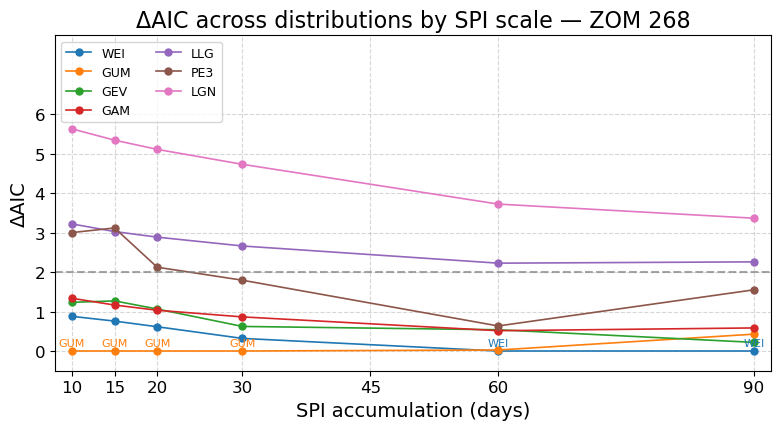

Saved plot: results/AIC_ZOM/DeltaAIC_ZOM_268.png
Saved ranking table: results/AIC_ZOM/Ranking_ZOM_268.xlsx
Processing ZOM 269 with 12 stations...


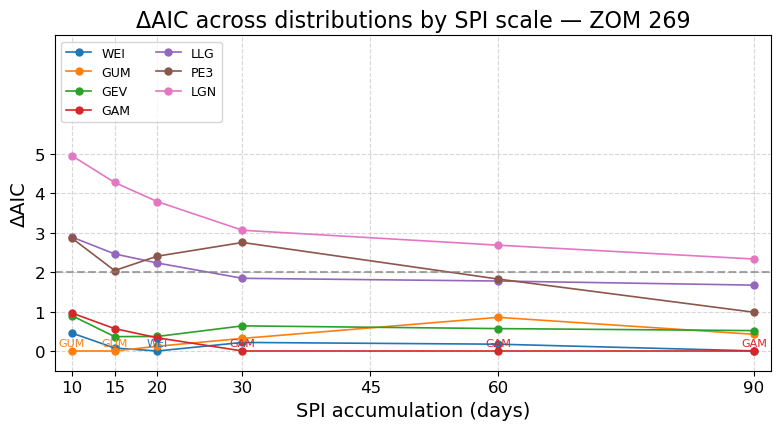

Saved plot: results/AIC_ZOM/DeltaAIC_ZOM_269.png
Saved ranking table: results/AIC_ZOM/Ranking_ZOM_269.xlsx
Processing ZOM 270 with 4 stations...


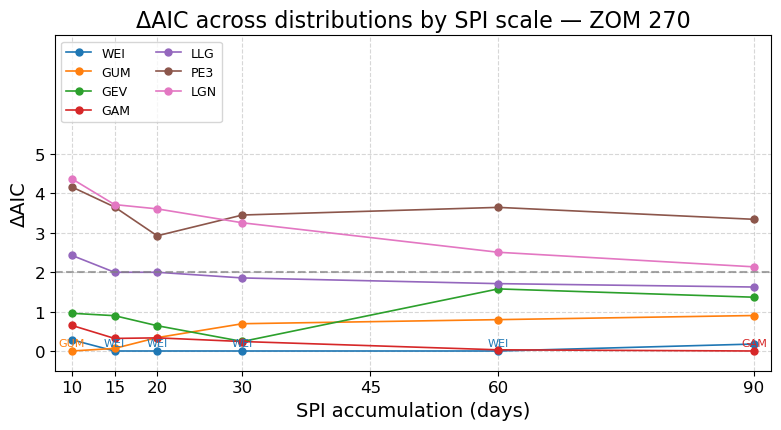

Saved plot: results/AIC_ZOM/DeltaAIC_ZOM_270.png
Saved ranking table: results/AIC_ZOM/Ranking_ZOM_270.xlsx
Processing ZOM 271 with 26 stations...


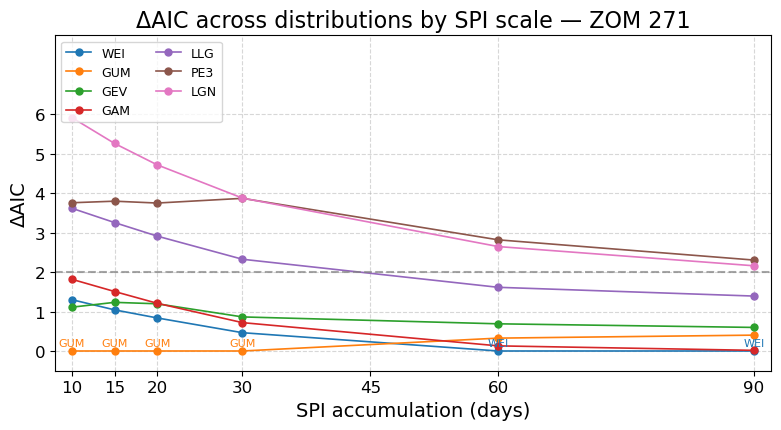

Saved plot: results/AIC_ZOM/DeltaAIC_ZOM_271.png
Saved ranking table: results/AIC_ZOM/Ranking_ZOM_271.xlsx
Processing ZOM 272 with 7 stations...


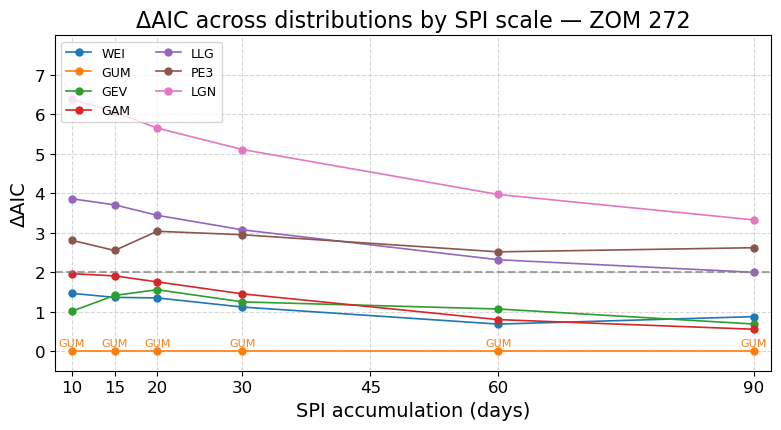

Saved plot: results/AIC_ZOM/DeltaAIC_ZOM_272.png
Saved ranking table: results/AIC_ZOM/Ranking_ZOM_272.xlsx
Processing ZOM 273 with 10 stations...


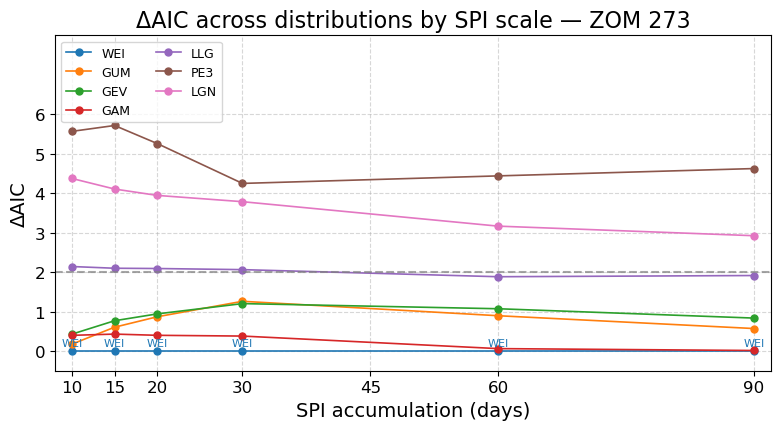

Saved plot: results/AIC_ZOM/DeltaAIC_ZOM_273.png
Saved ranking table: results/AIC_ZOM/Ranking_ZOM_273.xlsx
Processing ZOM 274 with 7 stations...


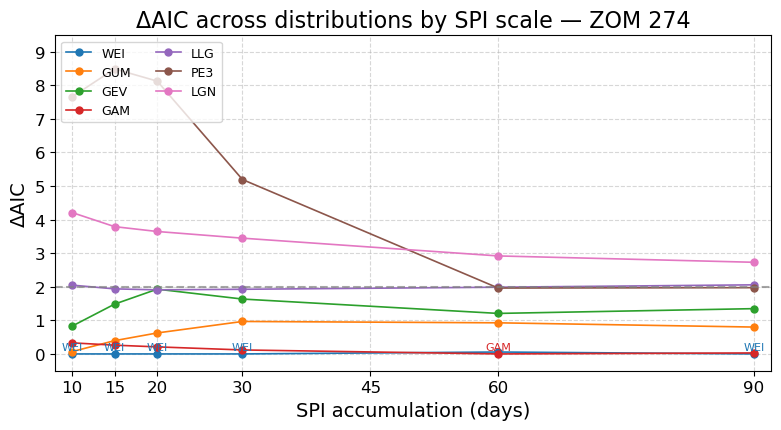

Saved plot: results/AIC_ZOM/DeltaAIC_ZOM_274.png
Saved ranking table: results/AIC_ZOM/Ranking_ZOM_274.xlsx
Processing ZOM 275 with 10 stations...


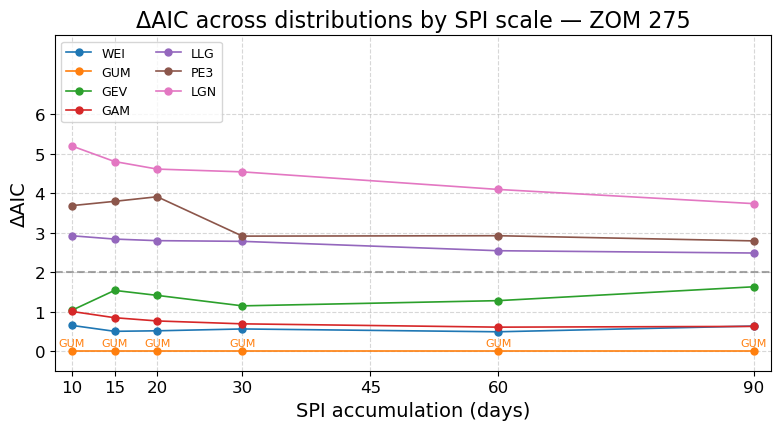

Saved plot: results/AIC_ZOM/DeltaAIC_ZOM_275.png
Saved ranking table: results/AIC_ZOM/Ranking_ZOM_275.xlsx
All ZOM processing completed.


In [130]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Fixed color palette for each fitted distribution
dist_colors = {
    'wei': '#1f77b4',
    'gum': '#ff7f0e',
    'gev': '#2ca02c',
    'gam': '#d62728',
    'llg': '#9467bd',
    'pe3': '#8c564b',
    'lgn': '#e377c2',
}

# Ensure these objects exist before running:
# - metadata: DataFrame indexed by station ID and containing a column 'ZOM'
# - rolled_dict: dict {scale: DataFrame_of_rolling_sums}
# - dist_list: list of tuples like ("gam", scs.gamma)
# - aic_dict: dict { (dist_name, scale) : DataFrame(index=date, columns=station_id) }
# If any of these are missing, raise a helpful error.
required_names = ["metadata", "rolled_dict", "dist_list", "aic_dict"]
for name in required_names:
    if name not in globals():
        raise NameError(f"Required object '{name}' not found in the workspace.")

# List of unique ZOM codes in metadata (sorted)
zom_list = sorted(metadata['ZOM'].dropna().unique())

# Valid SPI accumulation scales to evaluate
valid_scales = [10, 15, 20, 30, 45, 60, 90]

# Create output folders if they do not exist
os.makedirs("results/AIC_ZOM", exist_ok=True)
os.makedirs("results/AIC_ZOM/heatmap", exist_ok=True)

# Complexity (number of parameters) for each distribution used in the parsimony rule
param_complexity = {
    'wei': 2,  # Weibull
    'gum': 2,  # Gumbel
    'gam': 2,  # Gamma
    'lgn': 3,  # Lognormal (treat as 3 if using shape, loc, scale)
    'llg': 3,  # Log-logistic (Fisk)
    'pe3': 3,  # Pearson III
    'gev': 3,  # GEV
}

def choose_best_distribution(delta_row):
    """
    Choose the best distribution for one station-scale row based on:
    - smallest ΔAIC (candidate)
    - if candidate has higher complexity (3 params), prefer any 2-param distribution
      with ΔAIC < 2 (choose the smallest ΔAIC among those).
    """
    best_raw = delta_row.idxmin()
    # If candidate is a 2-parameter distribution, accept it immediately
    if param_complexity.get(best_raw, 3) == 2:
        return best_raw

    # Otherwise check for 2-parameter alternatives with deltaAIC < 2
    candidates_2param = [
        d for d, v in delta_row.items()
        if param_complexity.get(d, 3) == 2 and v < 2
    ]
    if candidates_2param:
        return min(candidates_2param, key=lambda d: delta_row[d])

    return best_raw


# Iterate through each ZOM and produce plots / tables
for zom in zom_list:
    pos_in_zom = metadata.loc[metadata['ZOM'] == zom].index.tolist()
    print(f"Processing ZOM {zom} with {len(pos_in_zom)} stations...")

    aic_summary_list = []

    # Compute mean AIC across stations in this ZOM for each scale and distribution
    for scale in rolled_dict.keys():
        if scale not in valid_scales:
            continue

        mean_per_dist = {}
        for dist_name, _ in dist_list:
            aic_df = aic_dict.get((dist_name, scale))
            if aic_df is None:
                continue

            # Keep only columns that belong to this ZOM
            cols = [c for c in aic_df.columns if c in pos_in_zom]
            if len(cols) == 0:
                continue

            # Mean over time then mean across stations (scalar)
            mean_aic = aic_df[cols].mean().mean()
            mean_per_dist[dist_name] = mean_aic

        if mean_per_dist:
            aic_summary_list.append(pd.DataFrame({
                'Distribusi': list(mean_per_dist.keys()),
                'Mean_AIC': list(mean_per_dist.values()),
                'Skala': scale,
                'ZOM': zom
            }))

    if not aic_summary_list:
        print(f"No AIC data for ZOM {zom}. Skipping.")
        continue

    df_aic = pd.concat(aic_summary_list, ignore_index=True)

    # Compute Delta AIC per scale (ΔAIC = Mean_AIC - min(Mean_AIC) for that scale)
    df_aic['DeltaAIC'] = df_aic.groupby('Skala')['Mean_AIC'].transform(lambda x: x - x.min())

    # Pivot to create matrix (rows=scale, cols=distribution) of ΔAIC
    best_dist_by_scale = df_aic.pivot(index='Skala', columns='Distribusi', values='DeltaAIC').sort_index()

    # Determine best distribution per scale using the parsimony rule
    best_dist_final = best_dist_by_scale.apply(choose_best_distribution, axis=1)

    # Plot ΔAIC curves for each distribution across scales
    fig, ax = plt.subplots(figsize=(8, 4.5))
    for dist, color in dist_colors.items():
        subset = df_aic[df_aic['Distribusi'] == dist]
        if not subset.empty:
            ax.plot(subset['Skala'], subset['DeltaAIC'],
                    '-o', color=color, label=dist.upper(),
                    linewidth=1.2, markersize=5)

    ax.axhline(2, linestyle='--', color='gray', alpha=0.7)
    # Annotate best distribution label near the selected ΔAIC
    for scale, bestdist in best_dist_final.items():
        if bestdist in best_dist_by_scale.columns:
            yvals = df_aic[(df_aic['Skala'] == scale) & (df_aic['Distribusi'] == bestdist)]['DeltaAIC'].values
            if len(yvals):
                yval = float(yvals[0])
                ax.text(scale, yval + 0.12, bestdist.upper(), fontsize=8,
                        ha='center', color=dist_colors.get(bestdist, 'black'))

    ax.set_xlabel("SPI accumulation (days)")
    ax.set_ylabel("ΔAIC")
    ax.set_ylim(-0.5, max(8, df_aic['DeltaAIC'].max() + 1))
    ax.set_xlim(min(valid_scales) - 2, max(valid_scales) + 2)
    ax.set_xticks(valid_scales)
    ax.set_yticks(np.arange(0, np.ceil(df_aic['DeltaAIC'].max()) + 1, 1.0))
    ax.grid(True, linestyle='--', alpha=0.5)
    ax.set_title(f"ΔAIC across distributions by SPI scale — ZOM {zom}")
    ax.legend(fontsize=9, loc='upper left', ncol=2)

    plt.tight_layout()
    png_path = f"results/AIC_ZOM/DeltaAIC_ZOM_{zom}.png"
    plt.savefig(png_path, dpi=300)
    plt.show()
    plt.close()
    print(f"Saved plot: {png_path}")

    # Rank distributions by how many scales they "win" (are selected by the rule)
    rank_series = best_dist_final.value_counts().rename_axis("Distribusi").reset_index(name="Jumlah_Menang")
    rank_path = f"results/AIC_ZOM/Ranking_ZOM_{zom}.xlsx"
    rank_series.to_excel(rank_path, index=False)
    print(f"Saved ranking table: {rank_path}")

print("All ZOM processing completed.")


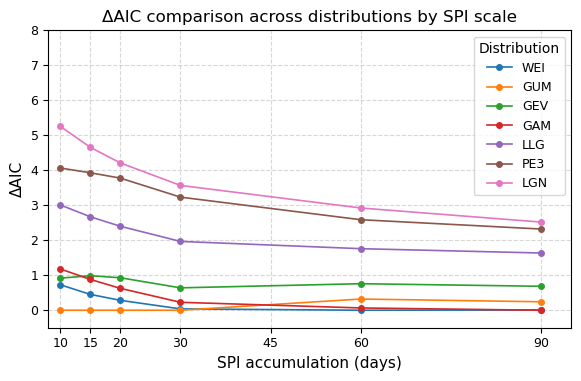

In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Fixed color palette for each fitted distribution
dist_colors = {
    'wei': '#1f77b4',  # Weibull (blue)
    'gum': '#ff7f0e',  # Gumbel (orange)
    'gev': '#2ca02c',  # GEV (green)
    'gam': '#d62728',  # Gamma (red)
    'llg': '#9467bd',  # Log-logistic (purple)
    'pe3': '#8c564b',  # Pearson III (brown)
    'lgn': '#e377c2',  # Log-normal (pink)
}

# SPI accumulation scales to include in the analysis
valid_scales = [10, 15, 20, 30, 45, 60, 90]

# Compute mean AIC per distribution for each scale (only within valid scales)
aic_summary = []

for scale in rolled_dict.keys():
    if scale not in valid_scales:
        continue  # skip scales outside 10–90 days

    mean_per_dist = {}
    for dist_name, _ in dist_list:
        aic_df = aic_dict.get((dist_name, scale))
        if aic_df is None:
            continue

        # Mean over time then mean across stations (scalar)
        mean_aic = aic_df.mean().mean()
        mean_per_dist[dist_name] = mean_aic

    if mean_per_dist:
        df_temp = pd.DataFrame({
            'Distribusi': list(mean_per_dist.keys()),
            'Mean_AIC': list(mean_per_dist.values()),
            'Skala': scale
        })
        aic_summary.append(df_temp)

# Combine per-scale results into a single DataFrame
if not aic_summary:
    raise ValueError("No AIC results found for the specified distributions/scales.")

df_aic = pd.concat(aic_summary, ignore_index=True)

# Compute ΔAIC relative to the best distribution for each scale
df_aic['DeltaAIC'] = df_aic.groupby('Skala')['Mean_AIC'].transform(lambda x: x - x.min())

# Plot ΔAIC across scales for each distribution
fig, ax = plt.subplots(figsize=(6, 4))

for dist, color in dist_colors.items():
    subset = df_aic[df_aic['Distribusi'] == dist]
    if subset.empty:
        continue
    ax.plot(subset['Skala'], subset['DeltaAIC'],
            '-o', color=color, label=dist.upper(), linewidth=1.2, markersize=4)

# Layout and labels
ax.set_xlabel("SPI accumulation (days)", fontsize=11)
ax.set_ylabel("ΔAIC", fontsize=11)
ax.set_ylim(-0.5, 8)
ax.set_xlim(8, 95)
ax.set_xticks(valid_scales)
ax.tick_params(labelsize=9)
ax.set_yticks(np.arange(0, 8.1, 1.0))
ax.set_title("ΔAIC comparison across distributions by SPI scale", fontsize=12)
ax.grid(True, linestyle='--', alpha=0.5)
ax.legend(title="Distribution", fontsize=9, title_fontsize=10, loc='best')

plt.tight_layout()
plt.show()


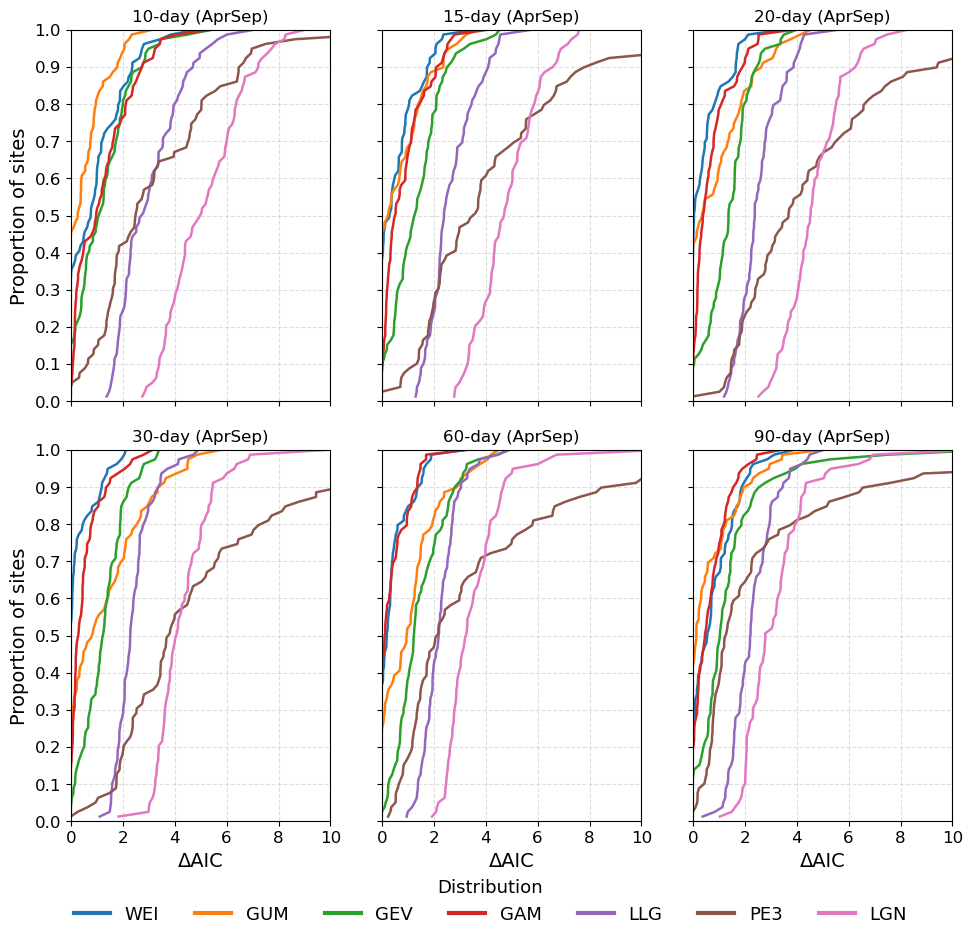

In [170]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Fixed color palette for each probability distribution
dist_colors = {
    'wei': '#1f77b4',
    'gum': '#ff7f0e',
    'gev': '#2ca02c',
    'gam': '#d62728',
    'llg': '#9467bd',
    'pe3': '#8c564b',
    'lgn': '#e377c2',
}

# Season selection for plotting: "AllSeason", "AprSep", "OktMar"
season_to_plot = "AprSep"

# SPI timescales to include in the CDF comparison
scales_to_plot = [10, 15, 20, 30, 60, 90]

# Helper function to build seasonal masks based on datetime index
def season_mask(idx):
    months = idx.month
    mask_aprsep = months.isin([4,5,6,7,8,9])
    mask_oktmar = months.isin([10,11,12,1,2,3])
    return mask_aprsep, mask_oktmar

# Grid layout for subplots
ncols = 3
nrows = 2
fig, axes = plt.subplots(nrows, ncols, figsize=(10, 10), sharex=True, sharey=True)
axes = axes.flatten()

for i, scale in enumerate(scales_to_plot):
    ax = axes[i]
    aic_scale_data = {}

    # Load AIC values at this timescale for each distribution
    for dist_name, _ in dist_list:
        aic_df = aic_dict.get((dist_name, scale))
        if aic_df is None:
            continue

        # Ensure datetime index
        if not isinstance(aic_df.index, pd.DatetimeIndex):
            try:
                aic_df.index = pd.to_datetime(aic_df.index, errors='coerce')
            except:
                pass

        mask_aprsep, mask_oktmar = season_mask(aic_df.index)

        if season_to_plot == "AllSeason":
            df_season = aic_df
        elif season_to_plot == "AprSep":
            df_season = aic_df.loc[mask_aprsep]
        else:
            df_season = aic_df.loc[mask_oktmar]

        if df_season.empty:
            continue

        mean_aic = df_season.mean(axis=0, skipna=True)
        aic_scale_data[dist_name] = mean_aic

    if not aic_scale_data:
        continue

    df_aic = pd.DataFrame(aic_scale_data)
    df_aic = df_aic.dropna(axis=1, how="all")

    delta = df_aic.subtract(df_aic.min(axis=1), axis=0)

    for dist_name, color in dist_colors.items():
        if dist_name not in delta.columns:
            continue

        vals = np.sort(delta[dist_name].dropna())
        if len(vals) == 0:
            continue

        cdf = np.arange(1, len(vals) + 1) / len(vals)
        ax.plot(vals, cdf, color=color, label=dist_name.upper(), lw=1.8)

    ax.set_title(f"{scale}-day ({season_to_plot})", fontsize=12)
    ax.set_xlim(0, 10)
    ax.set_ylim(0, 1.0)
    ax.set_yticks(np.arange(0, 1.01, 0.1))
    ax.grid(True, linestyle='--', alpha=0.4)

    if i % ncols == 0:
        ax.set_ylabel("Proportion of sites")
    if i >= (nrows - 1) * ncols:
        ax.set_xlabel("ΔAIC")

# Legend at the bottom center of the figure
handles = [
    plt.Line2D([0], [0], color=color, lw=3, label=dist.upper())
    for dist, color in dist_colors.items()
]
fig.legend(
    handles=handles,
    title="Distribution",
    loc='lower center',
    ncol=7,
    fontsize=13,
    title_fontsize=13,
    bbox_to_anchor=(0.5, 0.0),
    frameon=False
)

# fig.suptitle(f"ΔAIC Frequency for SPI Timescales ({season_to_plot})", fontsize=13, y=0.95)

plt.tight_layout(rect=[0, 0.05, 1, 0.95])
plt.show()


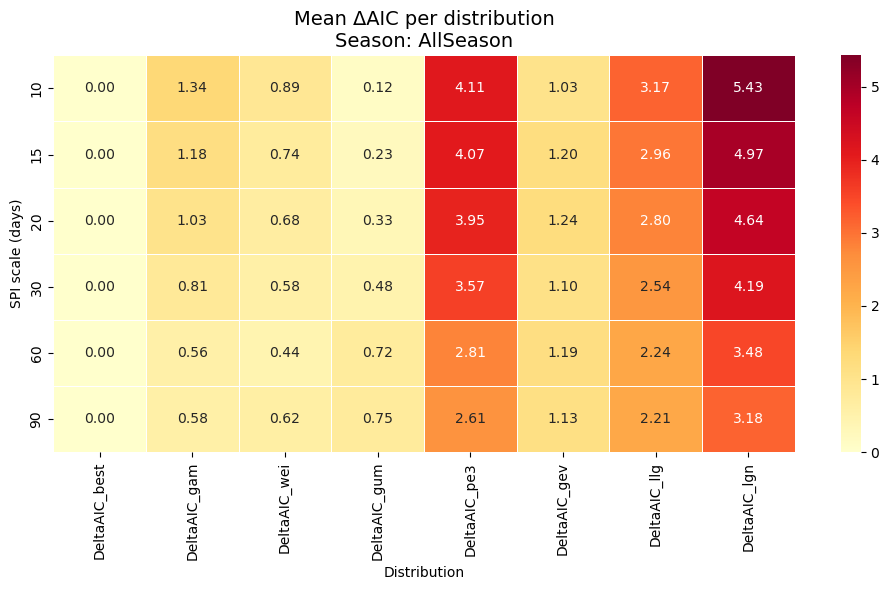

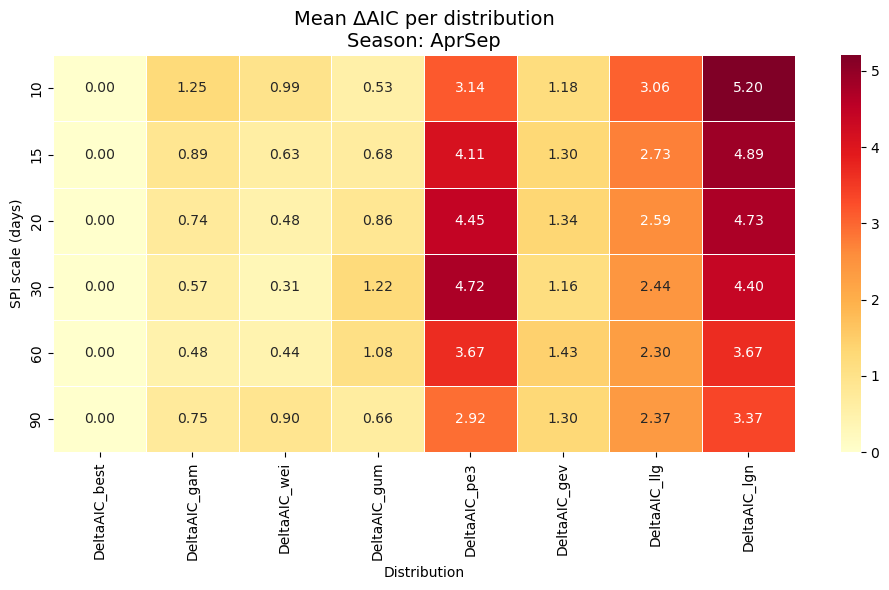

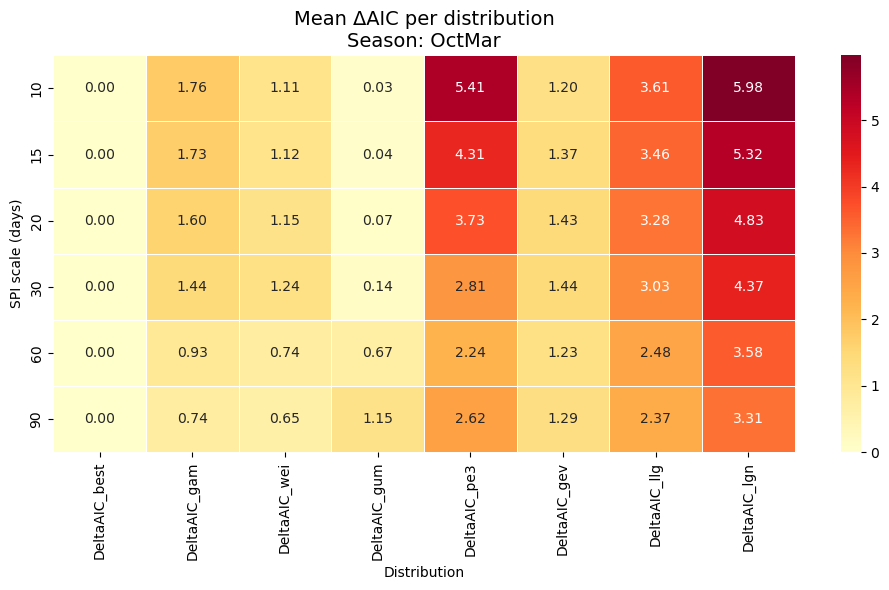

In [42]:
# Heatmap of mean ΔAIC values

import seaborn as sns
import matplotlib.pyplot as plt

# Select columns containing ΔAIC values
delta_cols = [c for c in result_df.columns if c.startswith("DeltaAIC_")]

# Compute mean ΔAIC grouped by SPI scale and season
heatmap_data = (
    result_df
    .groupby(["Skala", "Musim"])[delta_cols]
    .mean()
)

# Generate one heatmap per season
for season in heatmap_data.index.get_level_values(1).unique():
    subset = heatmap_data.xs(season, level="Musim")

    plt.figure(figsize=(10, 6))
    sns.heatmap(
        subset,
        annot=True,
        fmt=".2f",
        cmap="YlOrRd",
        linewidths=0.5
    )
    plt.title(f"Mean ΔAIC per distribution\nSeason: {season}", fontsize=14)
    plt.ylabel("SPI scale (days)")
    plt.xlabel("Distribution")
    plt.tight_layout()
    plt.show()


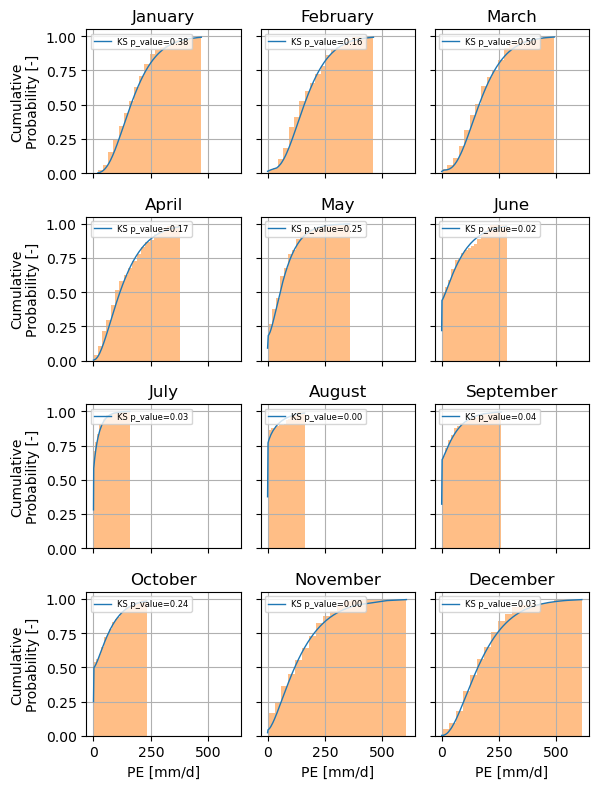

In [ ]:
station = '34040703a'
f, axl = plt.subplots(4, 3, figsize=(6, 8), sharey=True, sharex=True)
axsr = axl.ravel()
for date, dist in fit_dist._dist_dict.items():
    cdf = dist.cdf().sort_values()
    p_value = dist.ks_test()
    i = date.month - 1
    axsr[i].plot(
        dist.data.loc[cdf.index].values,
        cdf.values,
        color="C0",
        linewidth=1,
        label=f"KS {p_value=:0.2f}",
    )
    axsr[i].hist(
        dist.data.values,
        alpha=0.5,
        density=True,
        cumulative=True,
        bins=20,
        color="C1",
    )
    axsr[i].set_title(month_name[date.month])
    axsr[i].grid(True)
    axsr[i].legend(loc=2, fontsize=6)

[ax.set_ylabel("Cumulative\nProbability [-]") for ax in axl[:, 0]]
[ax.set_xlabel("PE [mm/d]") for ax in axl[-1, :]]
f.tight_layout()